## **Financial Risk for Loan Approval**
#### Datasets for both regression on RiskScore and binary classification on LoanAppr

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Exploratory Data Analysis (EDA)](#1) <br>
3.  [Data Visualization](#2) <br>
Comparison
Composition
Distribution
Relationship
4.  [Correlation](#3) <br>
5.  [Model Development](#5) <br>

</div>


Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.
Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

**The dataset includes the following columns:**

* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* EmploymentStatus: Job situation
* EducationLevel: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income

**Target Variable**
* LoanApproved: Loan approval status
* RiskScore: Risk assessment score

In [173]:
#pip install --upgrade kaggle


In [174]:
#pip install --upgrade kagglehub

In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

#print("Path to dataset files:", path)

In [177]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries<a id="0"></a>

In [178]:
#IMPORTING LIBRARIES

import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error,classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,normalize
from xgboost import XGBClassifier
from math import sqrt
from scipy import stats


In [179]:
#Display data in 2 decimal place
pd.options.display.float_format = '{:20.2f}'.format
#Display all columns 
pd.set_option("display.max_columns", None)

In [180]:
#READING THE DATA 
df = pd.read_csv('G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Loan.csv')
df.head(10)

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   
5      2018-01-06   37        178310          626    Self-Employed   
6      2018-01-07   58         51250          564         Employed   
7      2018-01-08   49         97345          516         Employed   
8      2018-01-09   34        116841          603         Employed   
9      2018-01-10   46         40615          612         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  \
0         Master          22       13152            48       Married   
1      Associate          15       26045            48        Single   
2       Bachelor          26       17627            36       Married   
3    High School          34       37898            96        Single   
4      Associate          17        9184            36       Married   
5         Master          16       15433            72       Married   
6    High School          39       12741            48       Married   
7    High School          23       19634            12      Divorced   
8       Bachelor          12       55353            60      Divorced   
9      Associate          19       25443            12       Married   

   NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0                   2                 Own                  183   
1                   1            Mortgage                  496   
2                   2                Rent                  902   
3                   1            Mortgage                  755   
4                   1            Mortgage                  274   
5                   0                Rent                  732   
6                   0                Rent                  337   
7                   5            Mortgage                  288   
8                   5                 Own                  638   
9                   4               Other                  704   

   CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0                       0.35                        1   
1                       0.09                        5   
2                       0.14                        2   
3                       0.27                        2   
4                       0.32                        0   
5                       0.10                        5   
6                       0.37                        6   
7                       0.21                        5   
8                       0.19                        3   
9                       0.51                        3   

   NumberOfCreditInquiries    DebtToIncomeRatio  BankruptcyHistory  \
0                        2                 0.36                  0   
1                        3                 0.33                  0   
2                        0                 0.24                  0   
3                        1                 0.44                  0   
4                        0                 0.08                  0   
5                        1                 0.26                  0   
6                        1                 0.13                  0   
7                        0                 0.40                  0   
8                        0                 0.31                  1   
9                        2                 0.51                  0   

          LoanPurpose  PreviousLoanDefaults  PaymentHistory  \
0                Home                     0              29   
1  Debt Consolidation                     0              21   
2           Education                     0              20   
3                Home                     0              27 

In [181]:
#DATA SIZE
df.shape

(20000, 36)

In [182]:
#DATA COLUMNS
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [183]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [184]:
# DUPLUCATES VALUES
df.duplicated().sum()

0

In [185]:
#MISSING VALUES
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [186]:
#DROPING UNNECESARRY COLUMNS
df.drop(columns='ApplicationDate',inplace=True,axis=1)

# Exploratory Data Analysis (EDA)<a id="1"></a>

In [187]:
#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [188]:
#STATISTICS SUMMARY
df.describe().T

count                 mean  \
Age                                    20000.00                39.75   
AnnualIncome                           20000.00             59161.47   
CreditScore                            20000.00               571.61   
Experience                             20000.00                17.52   
LoanAmount                             20000.00             24882.87   
LoanDuration                           20000.00                54.06   
NumberOfDependents                     20000.00                 1.52   
MonthlyDebtPayments                    20000.00               454.29   
CreditCardUtilizationRate              20000.00                 0.29   
NumberOfOpenCreditLines                20000.00                 3.02   
NumberOfCreditInquiries                20000.00                 0.99   
DebtToIncomeRatio                      20000.00                 0.29   
BankruptcyHistory                      20000.00                 0.05   
PreviousLoanDefaults                   20000.00                 0.10   
PaymentHistory                         20000.00                23.99   
LengthOfCreditHistory                  20000.00                14.96   
SavingsAccountBalance                  20000.00              4946.05   
CheckingAccountBalance                 20000.00              1782.56   
TotalAssets                            20000.00             96964.40   
TotalLiabilities                       20000.00             36252.41   
MonthlyIncome                          20000.00              4891.72   
UtilityBillsPaymentHistory             20000.00                 0.80   
JobTenure                              20000.00                 5.00   
NetWorth                               20000.00             72294.32   
BaseInterestRate                       20000.00                 0.24   
InterestRate                           20000.00                 0.24   
MonthlyLoanPayment                     20000.00               911.61   
TotalDebtToIncomeRatio                 20000.00                 0.40   
LoanApproved                           20000.00                 0.24   
RiskScore                              20000.00                50.77   

                                            std                  min  \
Age                                       11.62                18.00   
AnnualIncome                           40350.85             15000.00   
CreditScore                               51.00               343.00   
Experience                                11.32                 0.00   
LoanAmount                             13427.42              3674.00   
LoanDuration                              24.66                12.00   
NumberOfDependents                         1.39                 0.00   
MonthlyDebtPayments                      240.51                50.00   
CreditCardUtilizationRate                  0.16                 0.00   
NumberOfOpenCreditLines                    1.74                 0.00   
NumberOfCreditInquiries                    0.99                 0.00   
DebtToIncomeRatio                          0.16                 0.00   
BankruptcyHistory                          0.22                 0.00   
PreviousLoanDefaults                       0.30                 0.00   
PaymentHistory                             4.95                 8.00   
LengthOfCreditHistory                      8.37                 1.00   
SavingsAccountBalance                   6604.89                73.00   
CheckingAccountBalance                  2245.38                24.00   
TotalAssets                           120799.94              2098.00   
TotalLiabilities                       47251.51               372.00   
MonthlyIncome                           3296.77              1250.00   
UtilityBillsPaymentHistory                 0.12                 0.26   
JobTenure                                  2.24                 0.00   
NetWorth                              117920.02              1000.00   
BaseInter

# Data Visualization<a id="2"></a>


In [189]:
#VISUAL STYLE
sns.set_style('darkgrid')


In [190]:
df_hue = df['LoanApproved'].replace({0: 'No', 1: 'Yes'})#CHANGE IT FOR VISUALS ONLY 

### **COMPARISON**

In [191]:
#SEPARATE NUMERIC AND CATEGORIES

list(set(df.dtypes.to_list()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [192]:
#CATEGORICAL VALUES

chat_data  = df.select_dtypes(include=['O'])
#chat_data.drop(columns=['ApplicationDate'],axis=1,inplace=True)
chat_data.head()

EmploymentStatus EducationLevel MaritalStatus HomeOwnershipStatus  \
0         Employed         Master       Married                 Own   
1         Employed      Associate        Single            Mortgage   
2         Employed       Bachelor       Married                Rent   
3         Employed    High School        Single            Mortgage   
4         Employed      Associate       Married            Mortgage   

          LoanPurpose  
0                Home  
1  Debt Consolidation  
2           Education  
3                Home  
4  Debt Consolidation

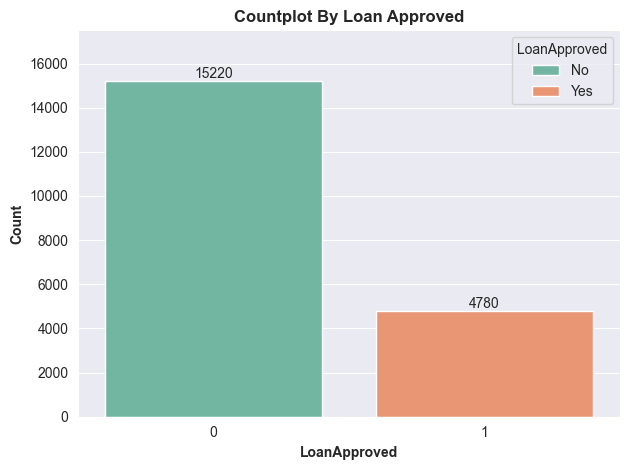

In [193]:
ax =sns.countplot(data=df,x=df['LoanApproved'],hue=df_hue,palette='Set2') #PLOT

#CHART LABELING
plt.title('Countplot By Loan Approved',fontsize =12,weight ='bold')
plt.ylabel('Count',weight ='bold') 
plt.xlabel('LoanApproved',weight ='bold') 
plt.ylim(0,17500)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)

#SHOW PLOT
plt.tight_layout()
plt.show()


**From the count plot, we can have below observations**

So, about 76.1% of the loans were not approved, and 23.9% were approved.



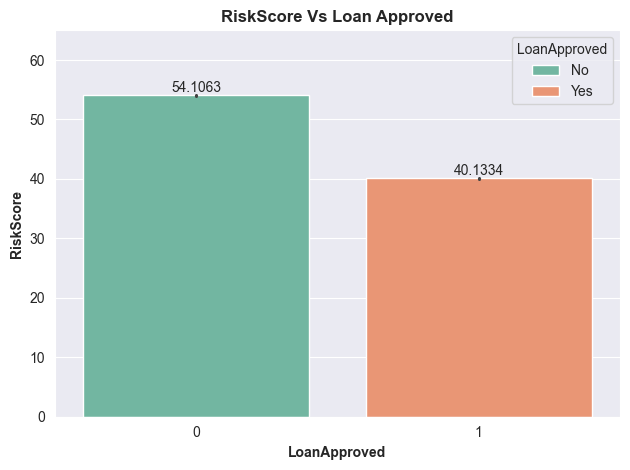

In [194]:
ax =sns.barplot(data=df,x=df['LoanApproved'],y=df['RiskScore'],hue=df_hue,palette='Set2')#PLOT


plt.title('RiskScore Vs Loan Approved',fontsize =12,weight ='bold')
plt.ylabel('RiskScore',weight ='bold') 
plt.xlabel('LoanApproved',weight ='bold')
plt.ylim(0,65)

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)

#SHOW PLOT
plt.tight_layout()
plt.show()

**From the Bar plot, we can have below observations**

Individuals with lower risk scores (40.1) are more likely to have their loans approved compared to those with higher risk scores (54.1), who are more likely to be denied.

* About **57 %** of are more likely to not have their loans approved
* While **43 %** are more likely to have their loans approved

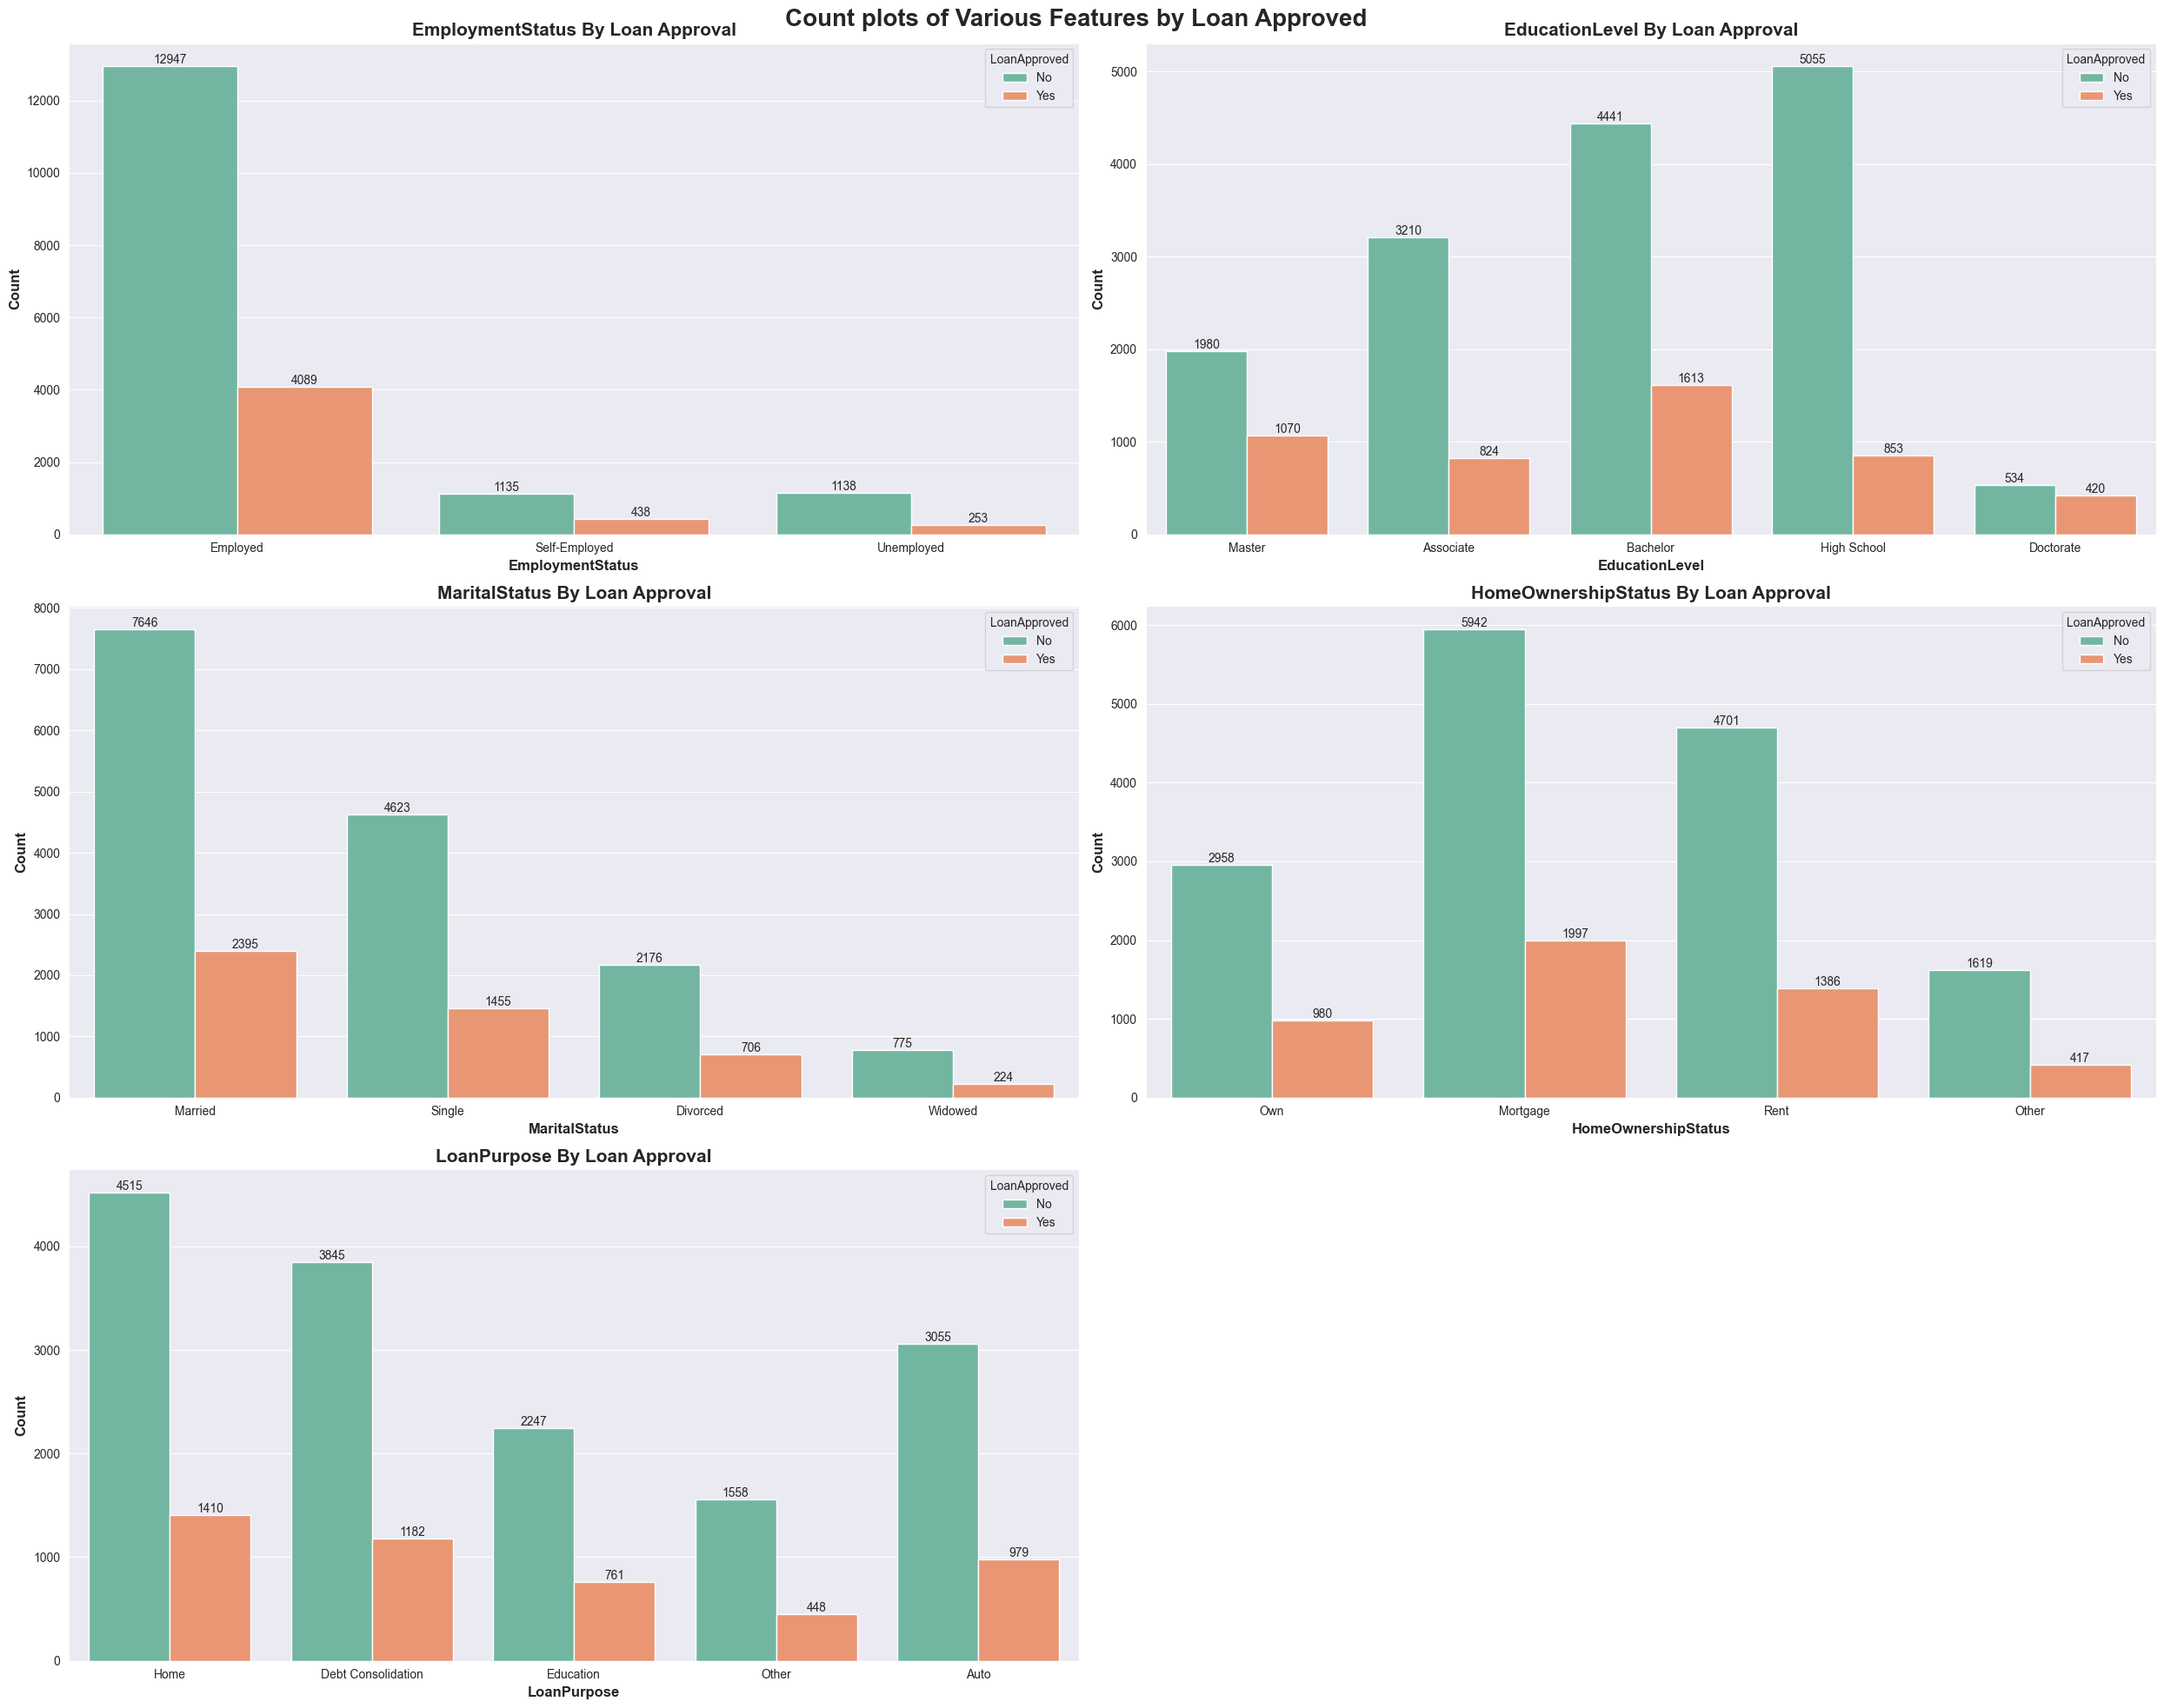

In [195]:
sns.set_style('darkgrid')
#PLOT SIZE
plt.figure(figsize=(25,20))

for i,col in enumerate(chat_data):
    plt.subplot(3,2, i + 1)
    ax =sns.countplot(x=col,hue=df_hue,palette='Set2',data=df)
    
    #Labeling Graph
    plt.title(f'{col} By Loan Approval',fontsize=15,weight='bold')
    plt.xlabel(col,fontsize=12,weight='bold')
    plt.ylabel('Count',fontsize=12,weight='bold')


    # Add values on top of each bar
    for container in ax.containers:
       ax.bar_label(container)




plt.suptitle("Count plots of Various Features by Loan Approved  ", fontsize=20,weight='bold')
plt.subplots_adjust(top=0.94)  # Adjust space for the main title

plt.tight_layout()
plt.show() 

### **COMPOSITION**

In [196]:
chat_data.columns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

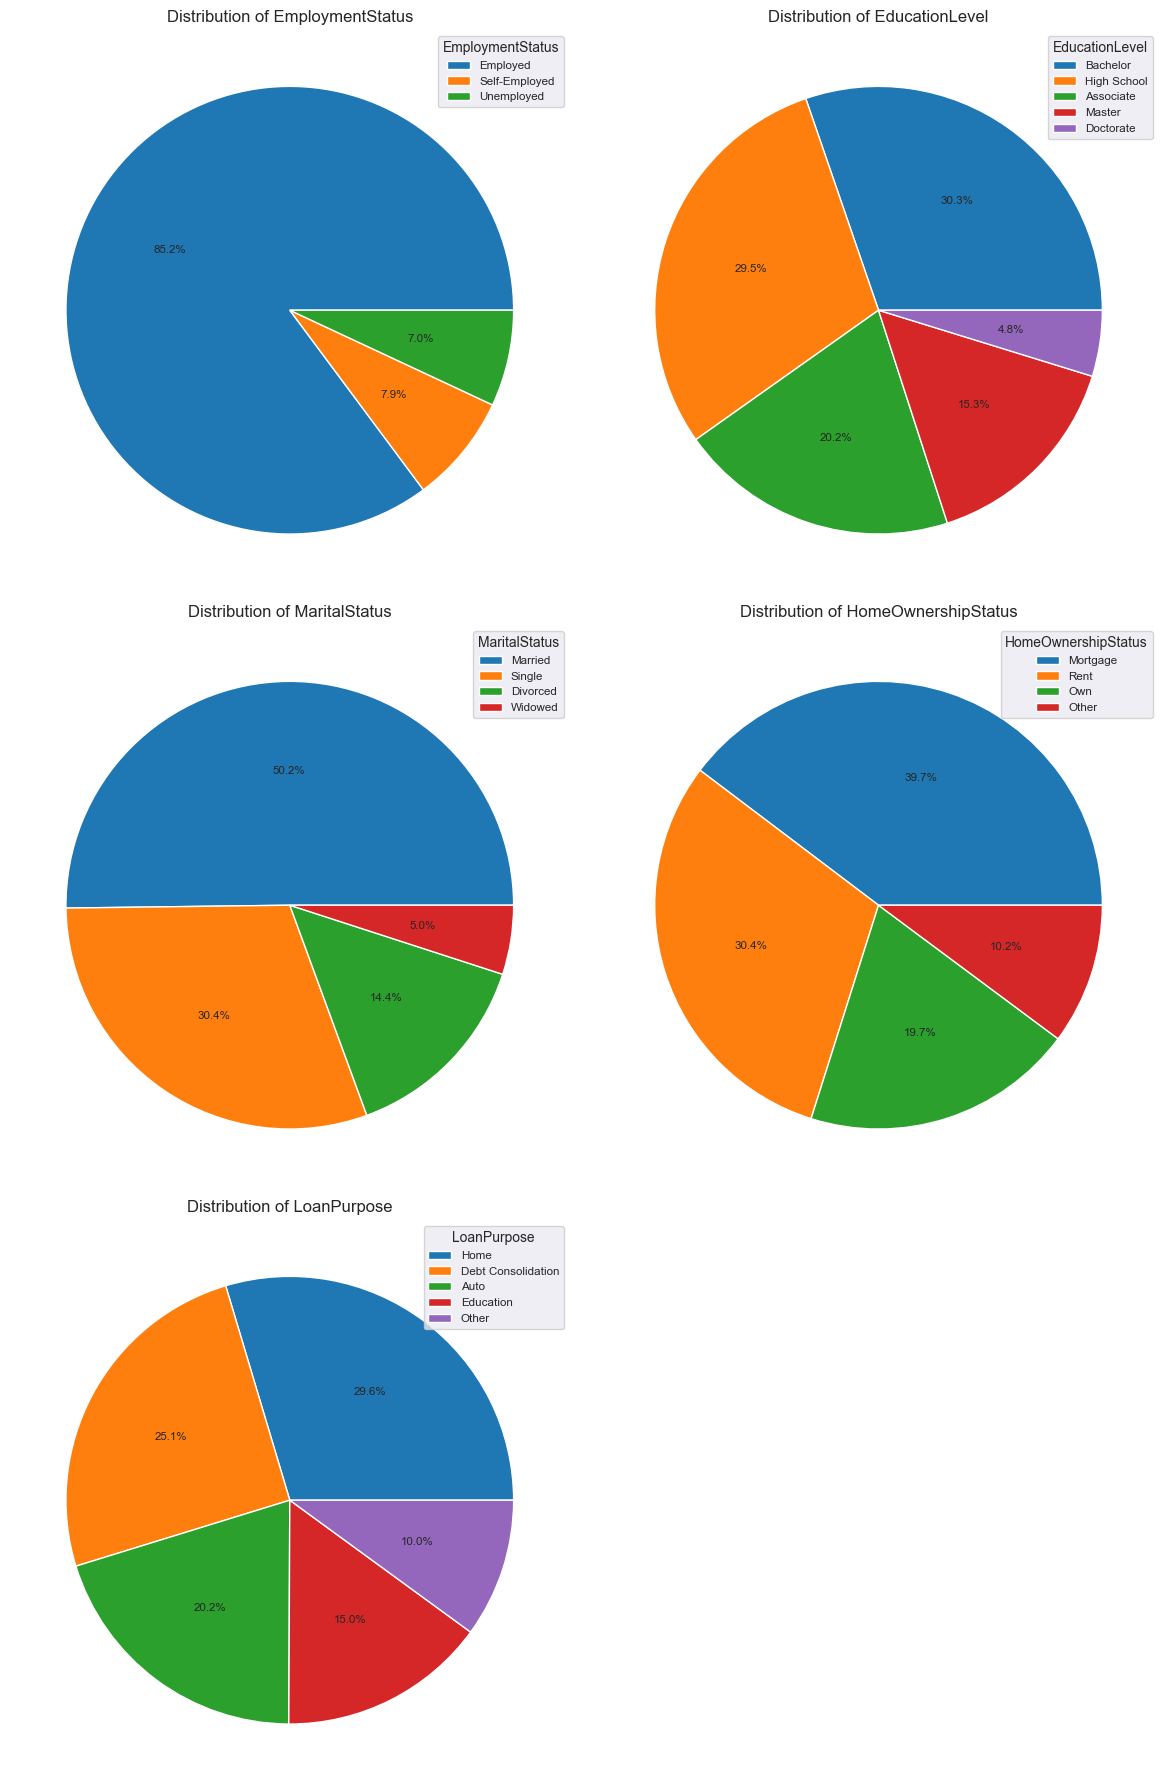

In [197]:

# Define the columns to plot
columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose']

# Number of rows and columns for the grid
rows = 3
cols = 2

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(12, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each pie chart
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        value_counts = chat_data[col].value_counts()
        wedges, texts, autotexts = axes[i].pie(
            value_counts,
            labels=None,  # Disable labels inside the pie
            autopct='%1.1f%%',
            textprops={'size': 'smaller'}
        )
        axes[i].set_title(f"Distribution of {col.replace('_', ' ')}")
        
        # Add legend
        axes[i].legend(wedges, value_counts.index, title=col.replace('_', ' '), loc="best", fontsize='small')

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### **DISTRIBUTION & RELATIONSHIP**

In [198]:
#NNUMERIC
num_data =df.select_dtypes(include=['int64','float64'])
num_data.head()

Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0   45         39948          617          22       13152            48   
1   38         39709          628          15       26045            48   
2   47         40724          570          26       17627            36   
3   58         69084          545          34       37898            96   
4   37        103264          594          17        9184            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                       0.35   
1                   1                  496                       0.09   
2                   2                  902                       0.14   
3                   1                  755                       0.27   
4                   1                  274                       0.32   

   NumberOfOpenCreditLines  NumberOfCreditInquiries    DebtToIncomeRatio  \
0                        1                        2                 0.36   
1                        5                        3                 0.33   
2                        2                        0                 0.24   
3                        2                        1                 0.44   
4                        0                        0                 0.08   

   BankruptcyHistory  PreviousLoanDefaults  PaymentHistory  \
0                  0                     0              29   
1                  0                     0              21   
2                  0                     0              20   
3                  0                     0              27   
4                  0                     0              26   

   LengthOfCreditHistory  SavingsAccountBalance  CheckingAccountBalance  \
0                      9                   7632                    1202   
1                      9                   4627                    3460   
2                     22                    886                     895   
3                     10                   1675                    1217   
4                     27                   1555                    4981   

   TotalAssets  TotalLiabilities        MonthlyIncome  \
0       146111             19183              3329.00   
1        53204              9595              3309.08   
2        25176            128874              3393.67   
3       104822              5370              5757.00   
4       244305             17286              8605.33   

   UtilityBillsPaymentHistory  JobTenure  NetWorth     BaseInterestRate  \
0                        0.72         11    126928                 0.20   
1                        0.94          3     43609                 0.21   
2                        0.87          6      5205                 0.22   
3                        0.90          5     99452                 0.30   
4                        0.94          5    227019                 0.20   

          InterestRate   MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0                 0.23               419.81                    0.18   
1                 0.20               794.05                    0.39   
2                 0.21               666.41                    0.46   
3                 0.30              1047.51                    0.31   
4                 0.18               330.18                    0.07   

   LoanApproved            RiskScore  
0             0                49.00  
1             0                52.00  
2             0                52.00  
3             0                54.00  
4             1                36.00

In [199]:
num_data.shape # HERE I WANTED TO CHECK NUM OF COLUMNS FOR SUBPLOT BELOW

(20000, 30)

#### **SCATTERPLOTS**

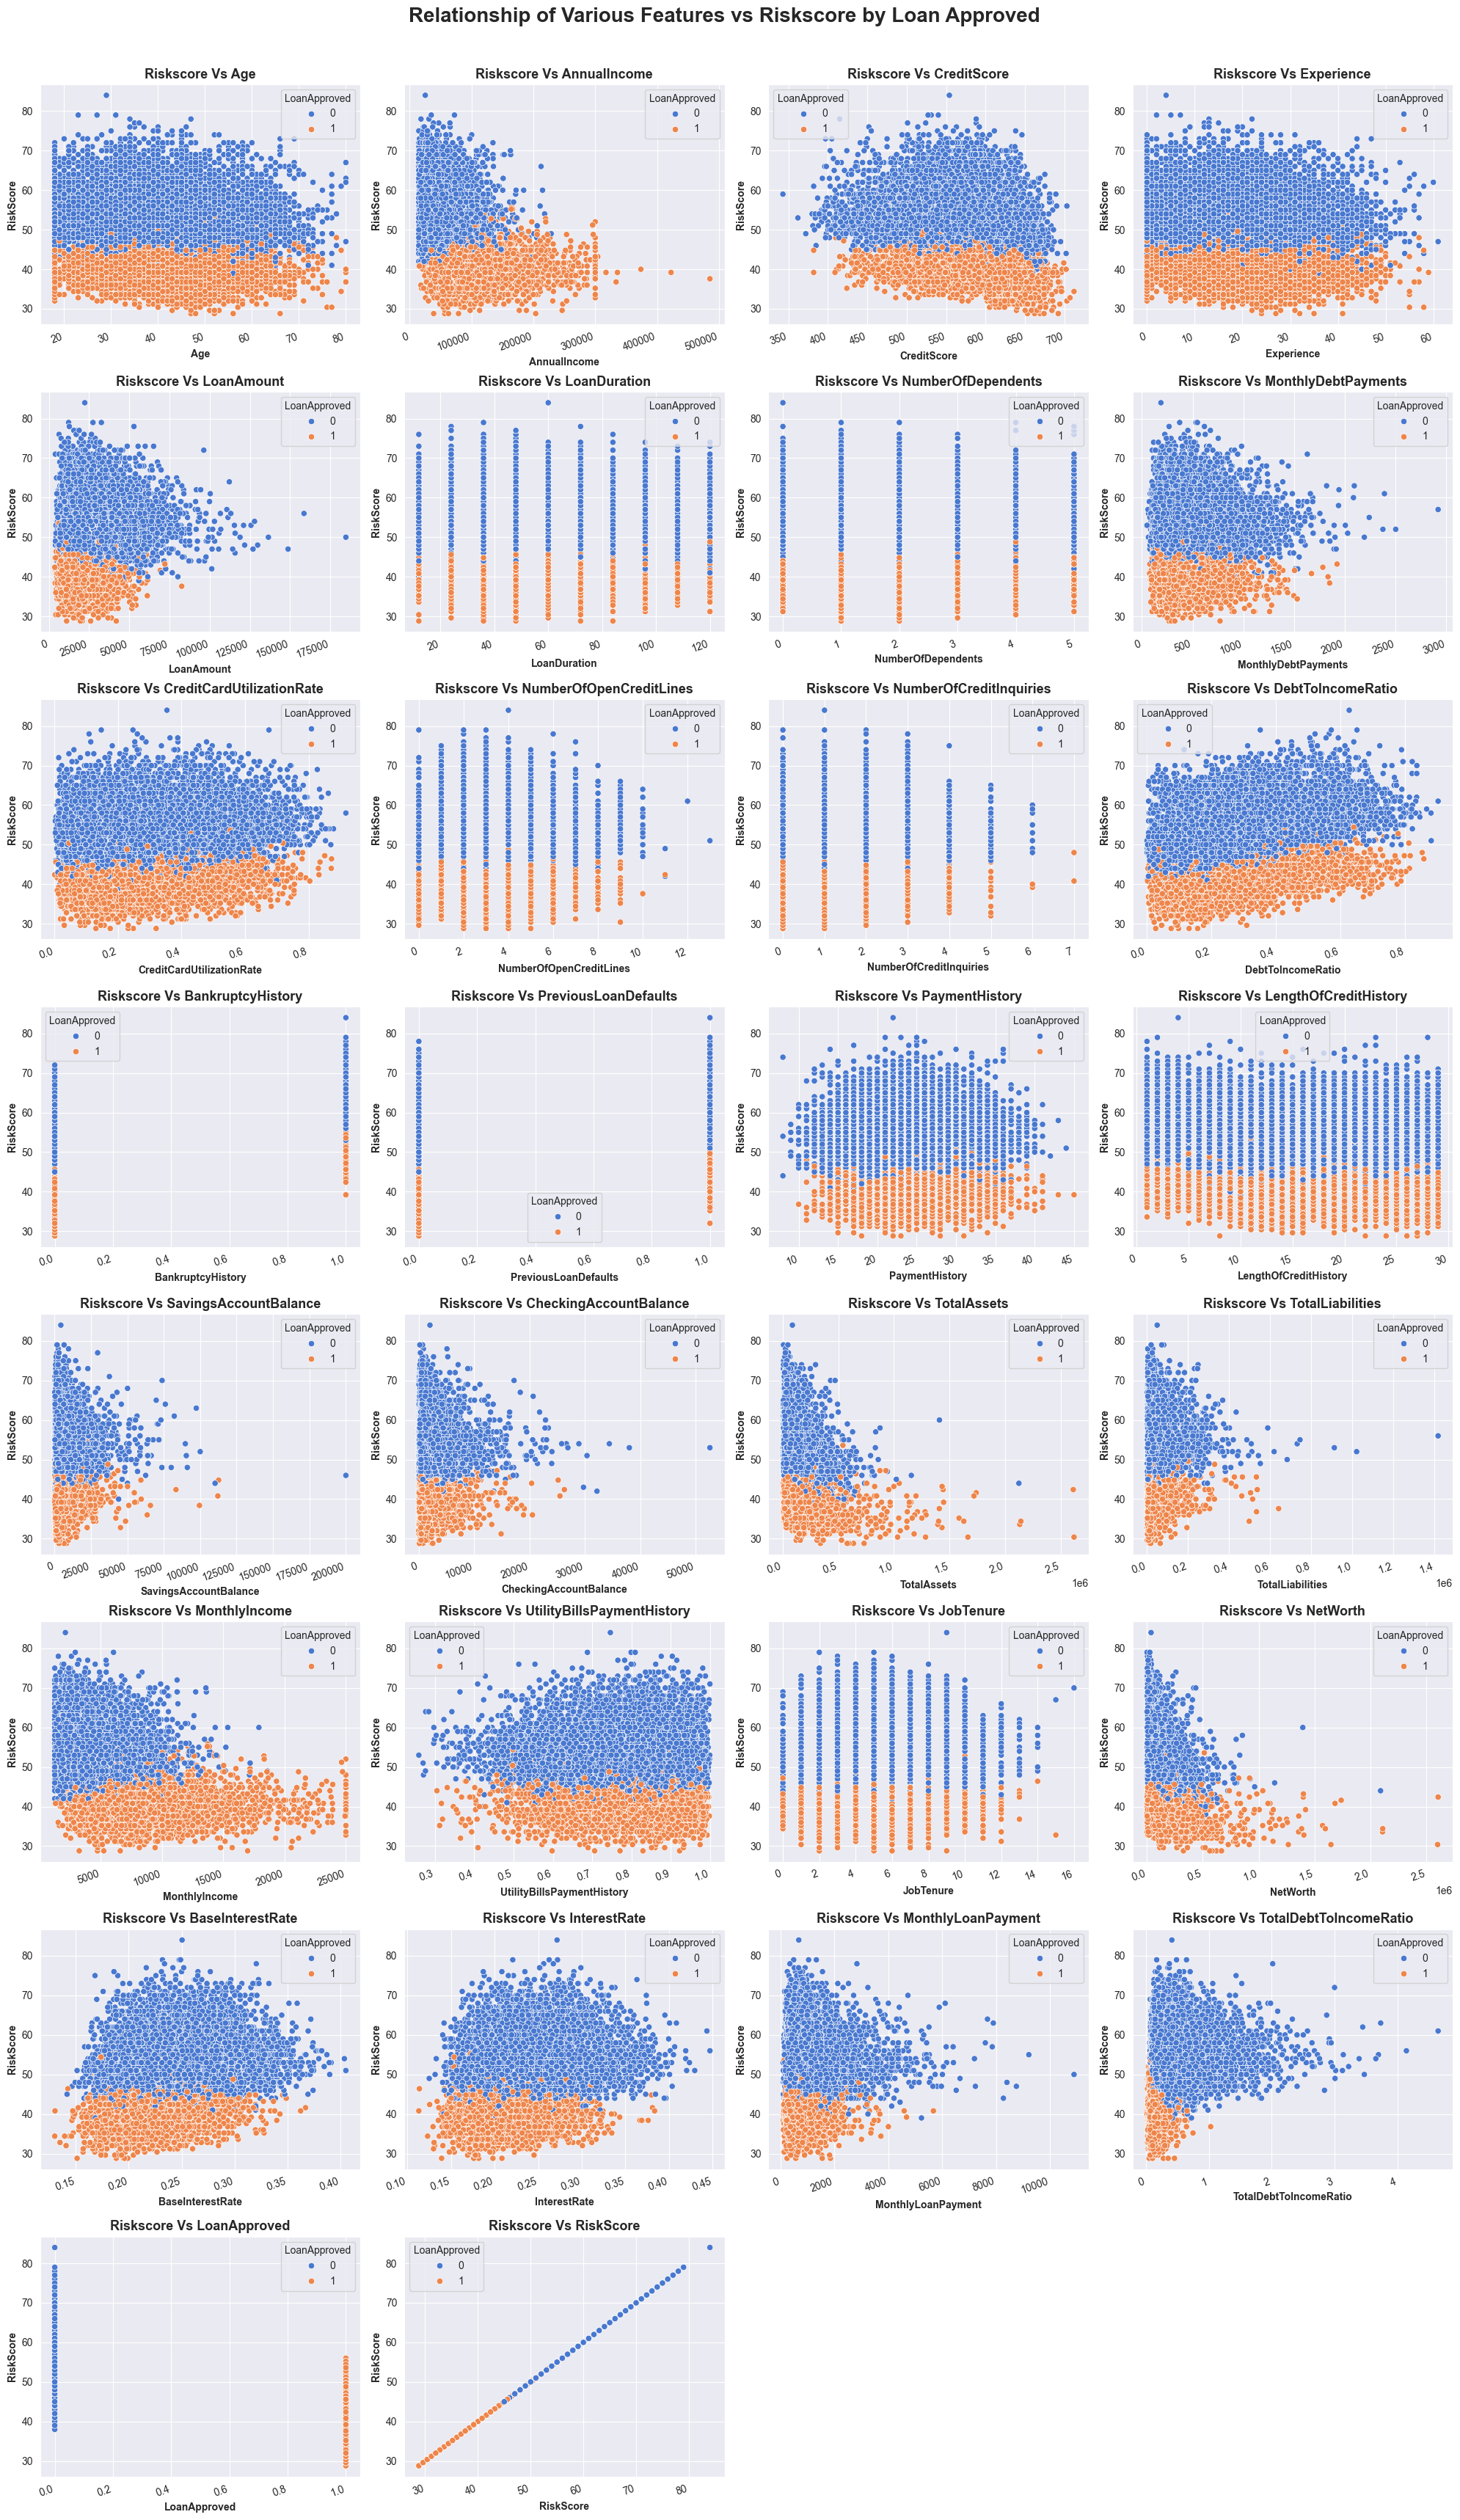

In [200]:
plt.figure(figsize=(20,35))

for i,col in enumerate(num_data):
    plt.subplot(8,4, i+1)
    ax =sns.scatterplot(x=col,y=df['RiskScore'],hue=df['LoanApproved'],data=df,palette='muted')
    plt.xlabel(col,fontsize=10,weight='bold')
    plt.ylabel('RiskScore',fontsize=10,weight='bold')
    plt.title(f'Riskscore Vs {col}',fontsize=13,weight='bold')
    plt.xticks(rotation=20,ha='right')


plt.tight_layout()

plt.suptitle("Relationship of Various Features vs Riskscore by Loan Approved  ", fontsize=20,weight='bold')
plt.subplots_adjust(top=0.95)  # Adjust space for the main title

plt.show()    

#### **HISTPLOTS**

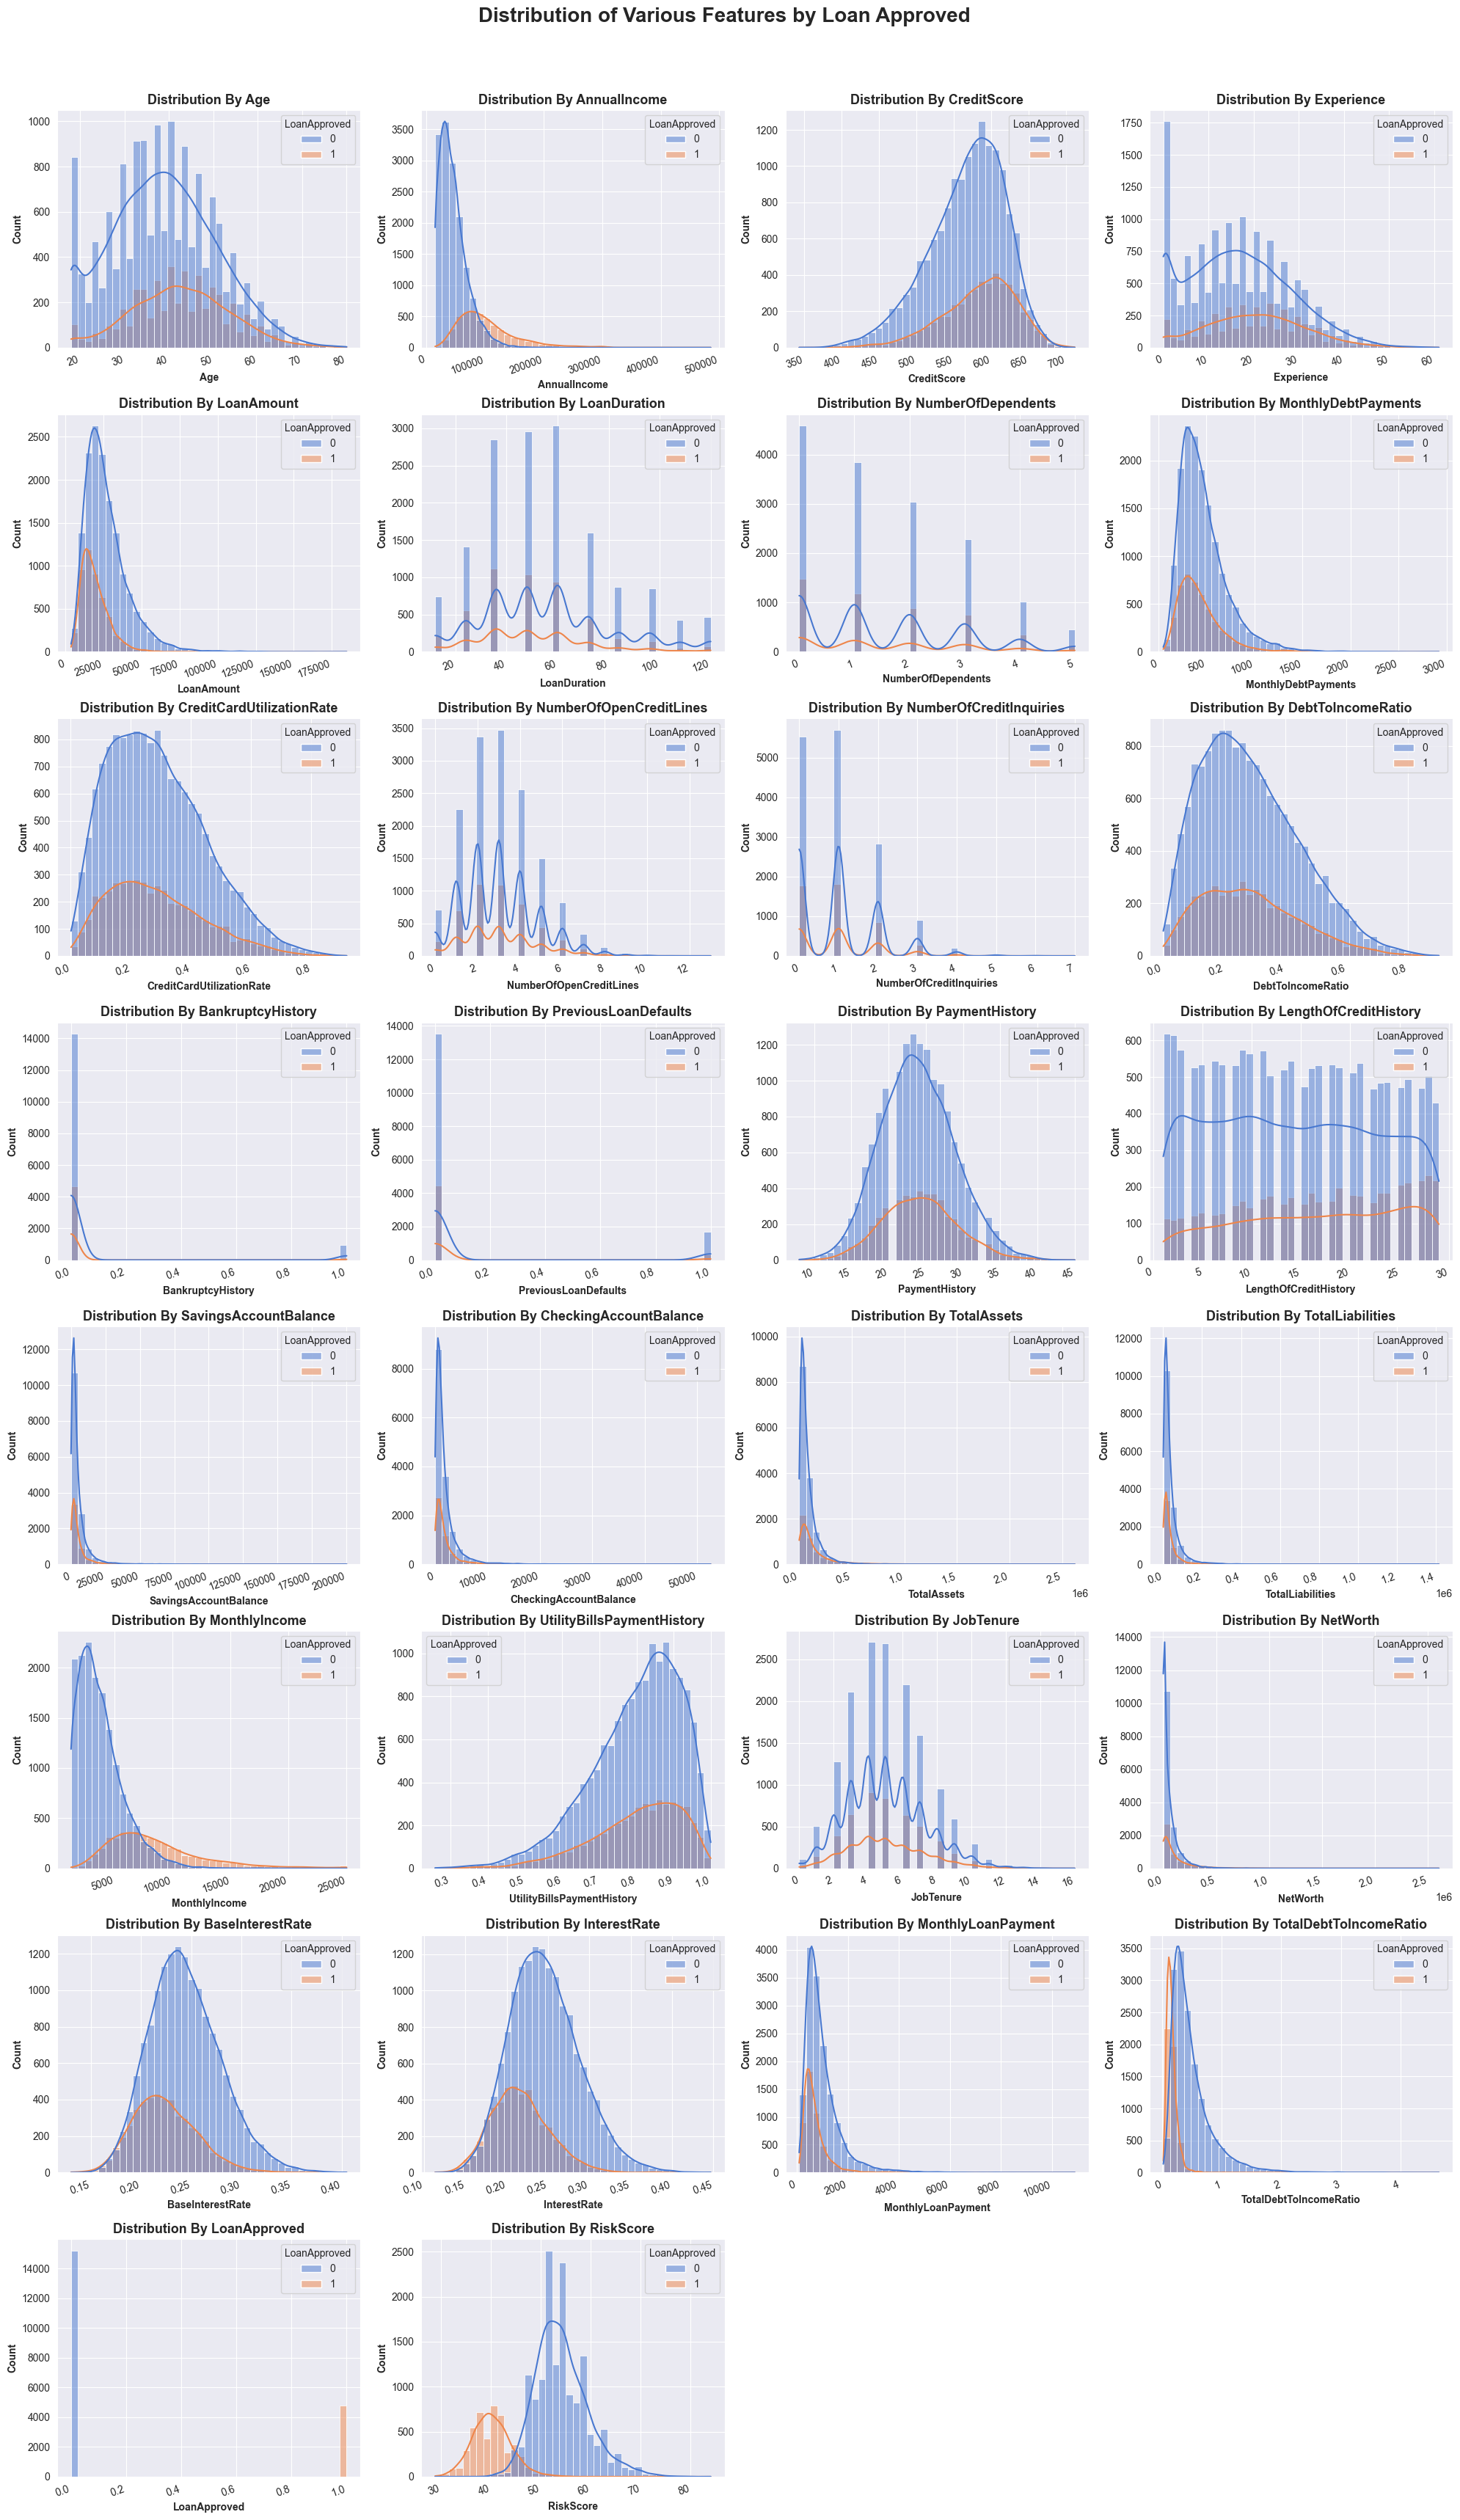

In [201]:
plt.figure(figsize=(20,35))
palette = sns.color_palette("viridis", len(num_data))

for i,col in enumerate(num_data):
    plt.subplot(8,4, i+1)
    ax =sns.histplot(x=col,hue=df['LoanApproved'],data=df, kde=True, bins=40,palette='muted')
    plt.xticks(rotation=20,ha='right')
    plt.ylabel('Count',fontsize=10,weight='bold')
    plt.xlabel(col,fontsize=10,weight='bold')
    plt.title(f'Distribution By {col}',fontsize=13,weight='bold')
 
plt.tight_layout()

plt.suptitle("Distribution of Various Features by Loan Approved  ", fontsize=20,weight='bold')
plt.subplots_adjust(top=0.94)  # Adjust space for the main title

plt.show()

#### **BOXPLOTS**

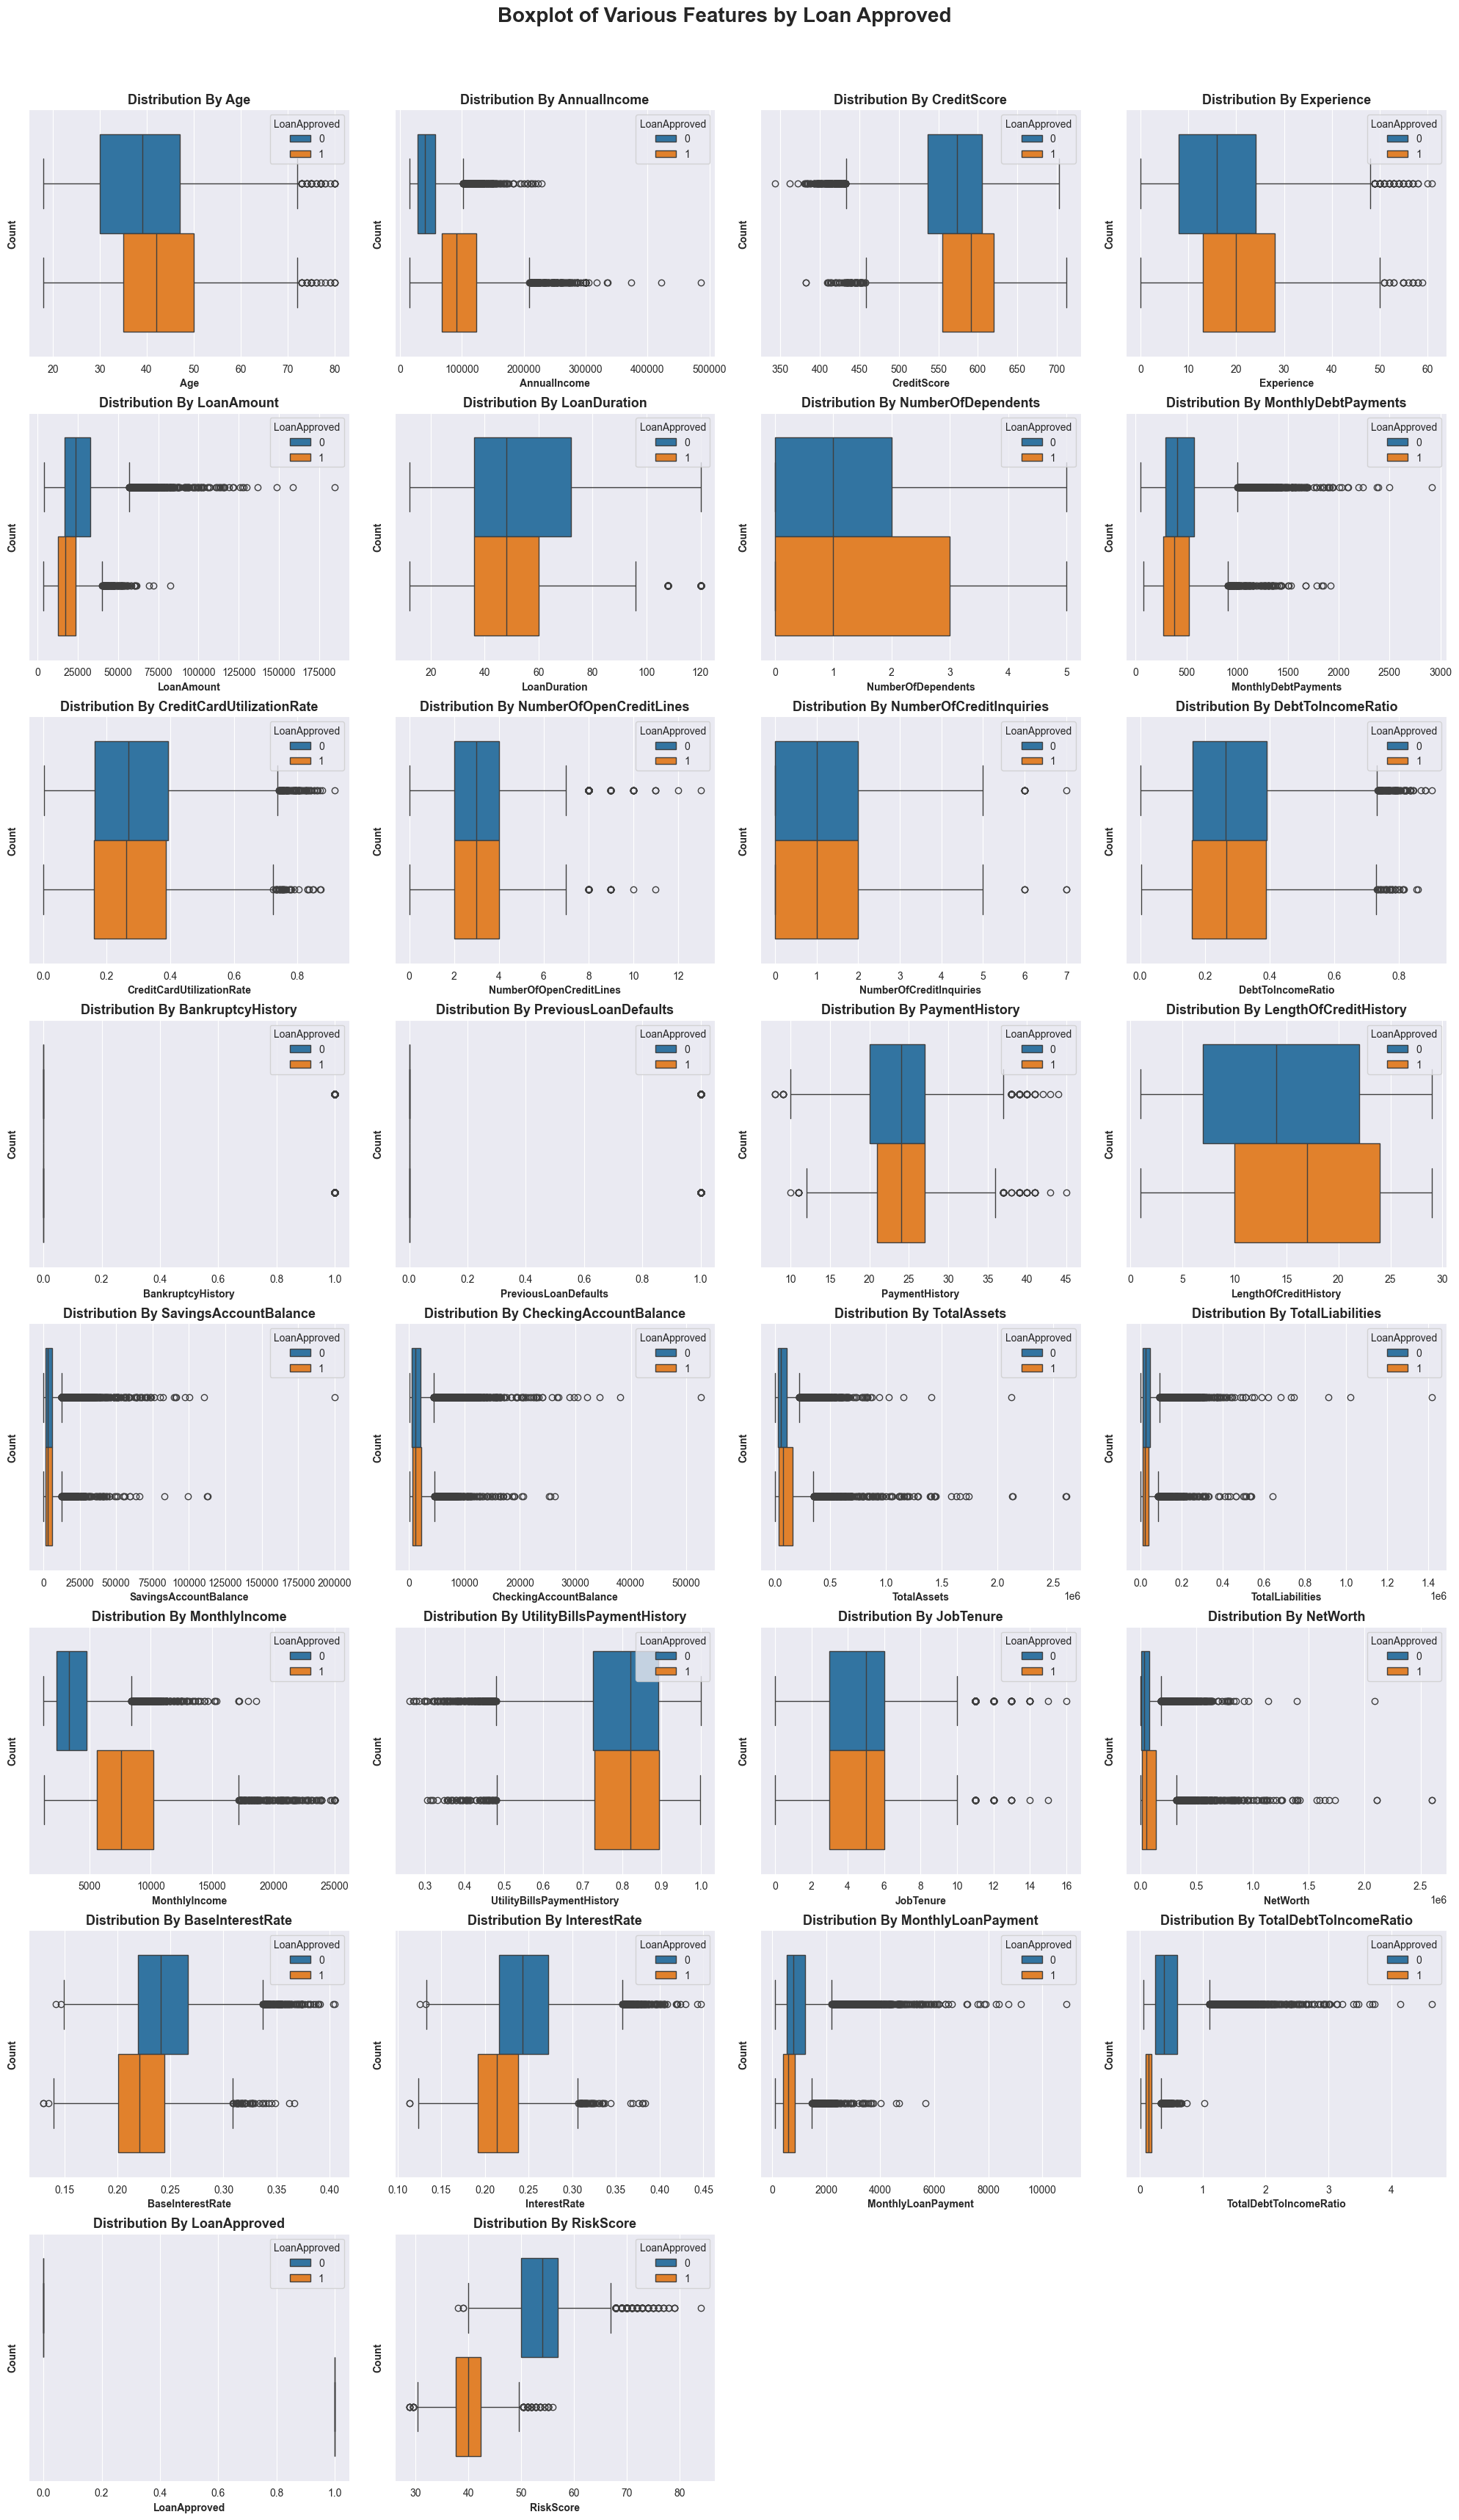

In [202]:
plt.figure(figsize=(20,35))

for i,col in enumerate(num_data):
    plt.subplot(8,4, i+1)
    ax =sns.boxplot(x=col,hue=df['LoanApproved'],data=df)
    plt.ylabel('Count',fontsize=10,weight='bold')
    plt.xlabel(col,fontsize=10,weight='bold')
    plt.title(f'Distribution By {col}',fontsize=13,weight='bold')
    plt.legend(loc='upper right', title='LoanApproved')


plt.tight_layout()
plt.suptitle("Boxplot of Various Features by Loan Approved  ", fontsize=20,weight='bold')
plt.subplots_adjust(top=0.94)  # Adjust space for the main title
plt.show()

# Correlation<a id="3"></a>

In [203]:
#CORRELATION BETWEEN VARIABLES
df.corr(numeric_only=True)

Age         AnnualIncome  \
Age                                        1.00                 0.14   
AnnualIncome                               0.14                 1.00   
CreditScore                                0.32                 0.10   
Experience                                 0.98                 0.15   
LoanAmount                                -0.01                -0.00   
LoanDuration                              -0.01                 0.00   
NumberOfDependents                        -0.00                -0.00   
MonthlyDebtPayments                        0.02                -0.00   
CreditCardUtilizationRate                 -0.00                -0.01   
NumberOfOpenCreditLines                   -0.00                -0.01   
NumberOfCreditInquiries                   -0.00                -0.01   
DebtToIncomeRatio                          0.00                 0.00   
BankruptcyHistory                          0.01                 0.00   
PreviousLoanDefaults                      -0.00                 0.00   
PaymentHistory                            -0.00                 0.00   
LengthOfCreditHistory                     -0.00                -0.01   
SavingsAccountBalance                      0.00                -0.00   
CheckingAccountBalance                     0.01                 0.01   
TotalAssets                                0.01                -0.01   
TotalLiabilities                          -0.00                -0.00   
MonthlyIncome                              0.14                 0.99   
UtilityBillsPaymentHistory                -0.01                -0.01   
JobTenure                                 -0.00                -0.00   
NetWorth                                   0.01                -0.00   
BaseInterestRate                          -0.24                -0.07   
InterestRate                              -0.20                -0.06   
MonthlyLoanPayment                        -0.02                -0.00   
TotalDebtToIncomeRatio                    -0.11                -0.53   
LoanApproved                               0.14                 0.60   
RiskScore                                 -0.16                -0.48   

                                    CreditScore           Experience  \
Age                                        0.32                 0.98   
AnnualIncome                               0.10                 0.15   
CreditScore                                1.00                 0.33   
Experience                                 0.33                 1.00   
LoanAmount                                -0.01                -0.01   
LoanDuration                              -0.00                -0.01   
NumberOfDependents                        -0.01                 0.00   
MonthlyDebtPayments                        0.01                 0.02   
CreditCardUtilizationRate                 -0.01                -0.00   
NumberOfOpenCreditLines                   -0.01                -0.00   
NumberOfCreditInquiries                   -0.00                -0.00   
DebtToIncomeRatio                          0.00                 0.00   
BankruptcyHistory                          0.01                 0.01   
PreviousLoanDefaults                      -0.01                -0.00   
PaymentHistory                             0.00                -0.00   
LengthOfCreditHistory                      0.01                -0.00   
SavingsAccountBalance                     -0.01                 0.01   
CheckingAccountBalance                     0.01                 0.01   
TotalAssets                                0.00                 0.01   
TotalLiabilities                          -0.01                -0.00   
MonthlyIncome                              0.10                 0.15   
UtilityBillsPaymentHistory                -0.01                -0.01   
JobTenure                                  0.01                -0.00   
NetWorth                                   0.00                 0.02   
BaseInteres

In [204]:
##CORRELATION BETWEEN LOANAPPROVED AND VARIABLES
LoanApproved = df.corr(numeric_only=True)['LoanApproved'].sort_values(ascending=False)
LoanApproved

LoanApproved                                 1.00
MonthlyIncome                                0.60
AnnualIncome                                 0.60
NetWorth                                     0.19
TotalAssets                                  0.18
CreditScore                                  0.14
Age                                          0.14
Experience                                   0.14
LengthOfCreditHistory                        0.11
PaymentHistory                               0.03
JobTenure                                    0.00
UtilityBillsPaymentHistory                   0.00
NumberOfDependents                           0.00
SavingsAccountBalance                        0.00
CheckingAccountBalance                       0.00
DebtToIncomeRatio                            0.00
NumberOfOpenCreditLines                     -0.00
NumberOfCreditInquiries                     -0.01
CreditCardUtilizationRate                   -0.01
TotalLiabilities                            -0.03


In [205]:
##CORRELATION BETWEEN RISKSCORE AND VARIABLES
RiskScore = df.corr(numeric_only=True)['RiskScore'].sort_values(ascending=False)
RiskScore

RiskScore                                    1.00
BankruptcyHistory                            0.38
TotalDebtToIncomeRatio                       0.34
DebtToIncomeRatio                            0.33
InterestRate                                 0.27
PreviousLoanDefaults                         0.26
BaseInterestRate                             0.26
LoanAmount                                   0.14
MonthlyLoanPayment                           0.12
CreditCardUtilizationRate                    0.11
TotalLiabilities                             0.06
LoanDuration                                 0.05
MonthlyDebtPayments                          0.04
NumberOfOpenCreditLines                      0.01
NumberOfCreditInquiries                      0.00
SavingsAccountBalance                        0.00
NumberOfDependents                           0.00
CheckingAccountBalance                      -0.00
JobTenure                                   -0.00
UtilityBillsPaymentHistory                  -0.01


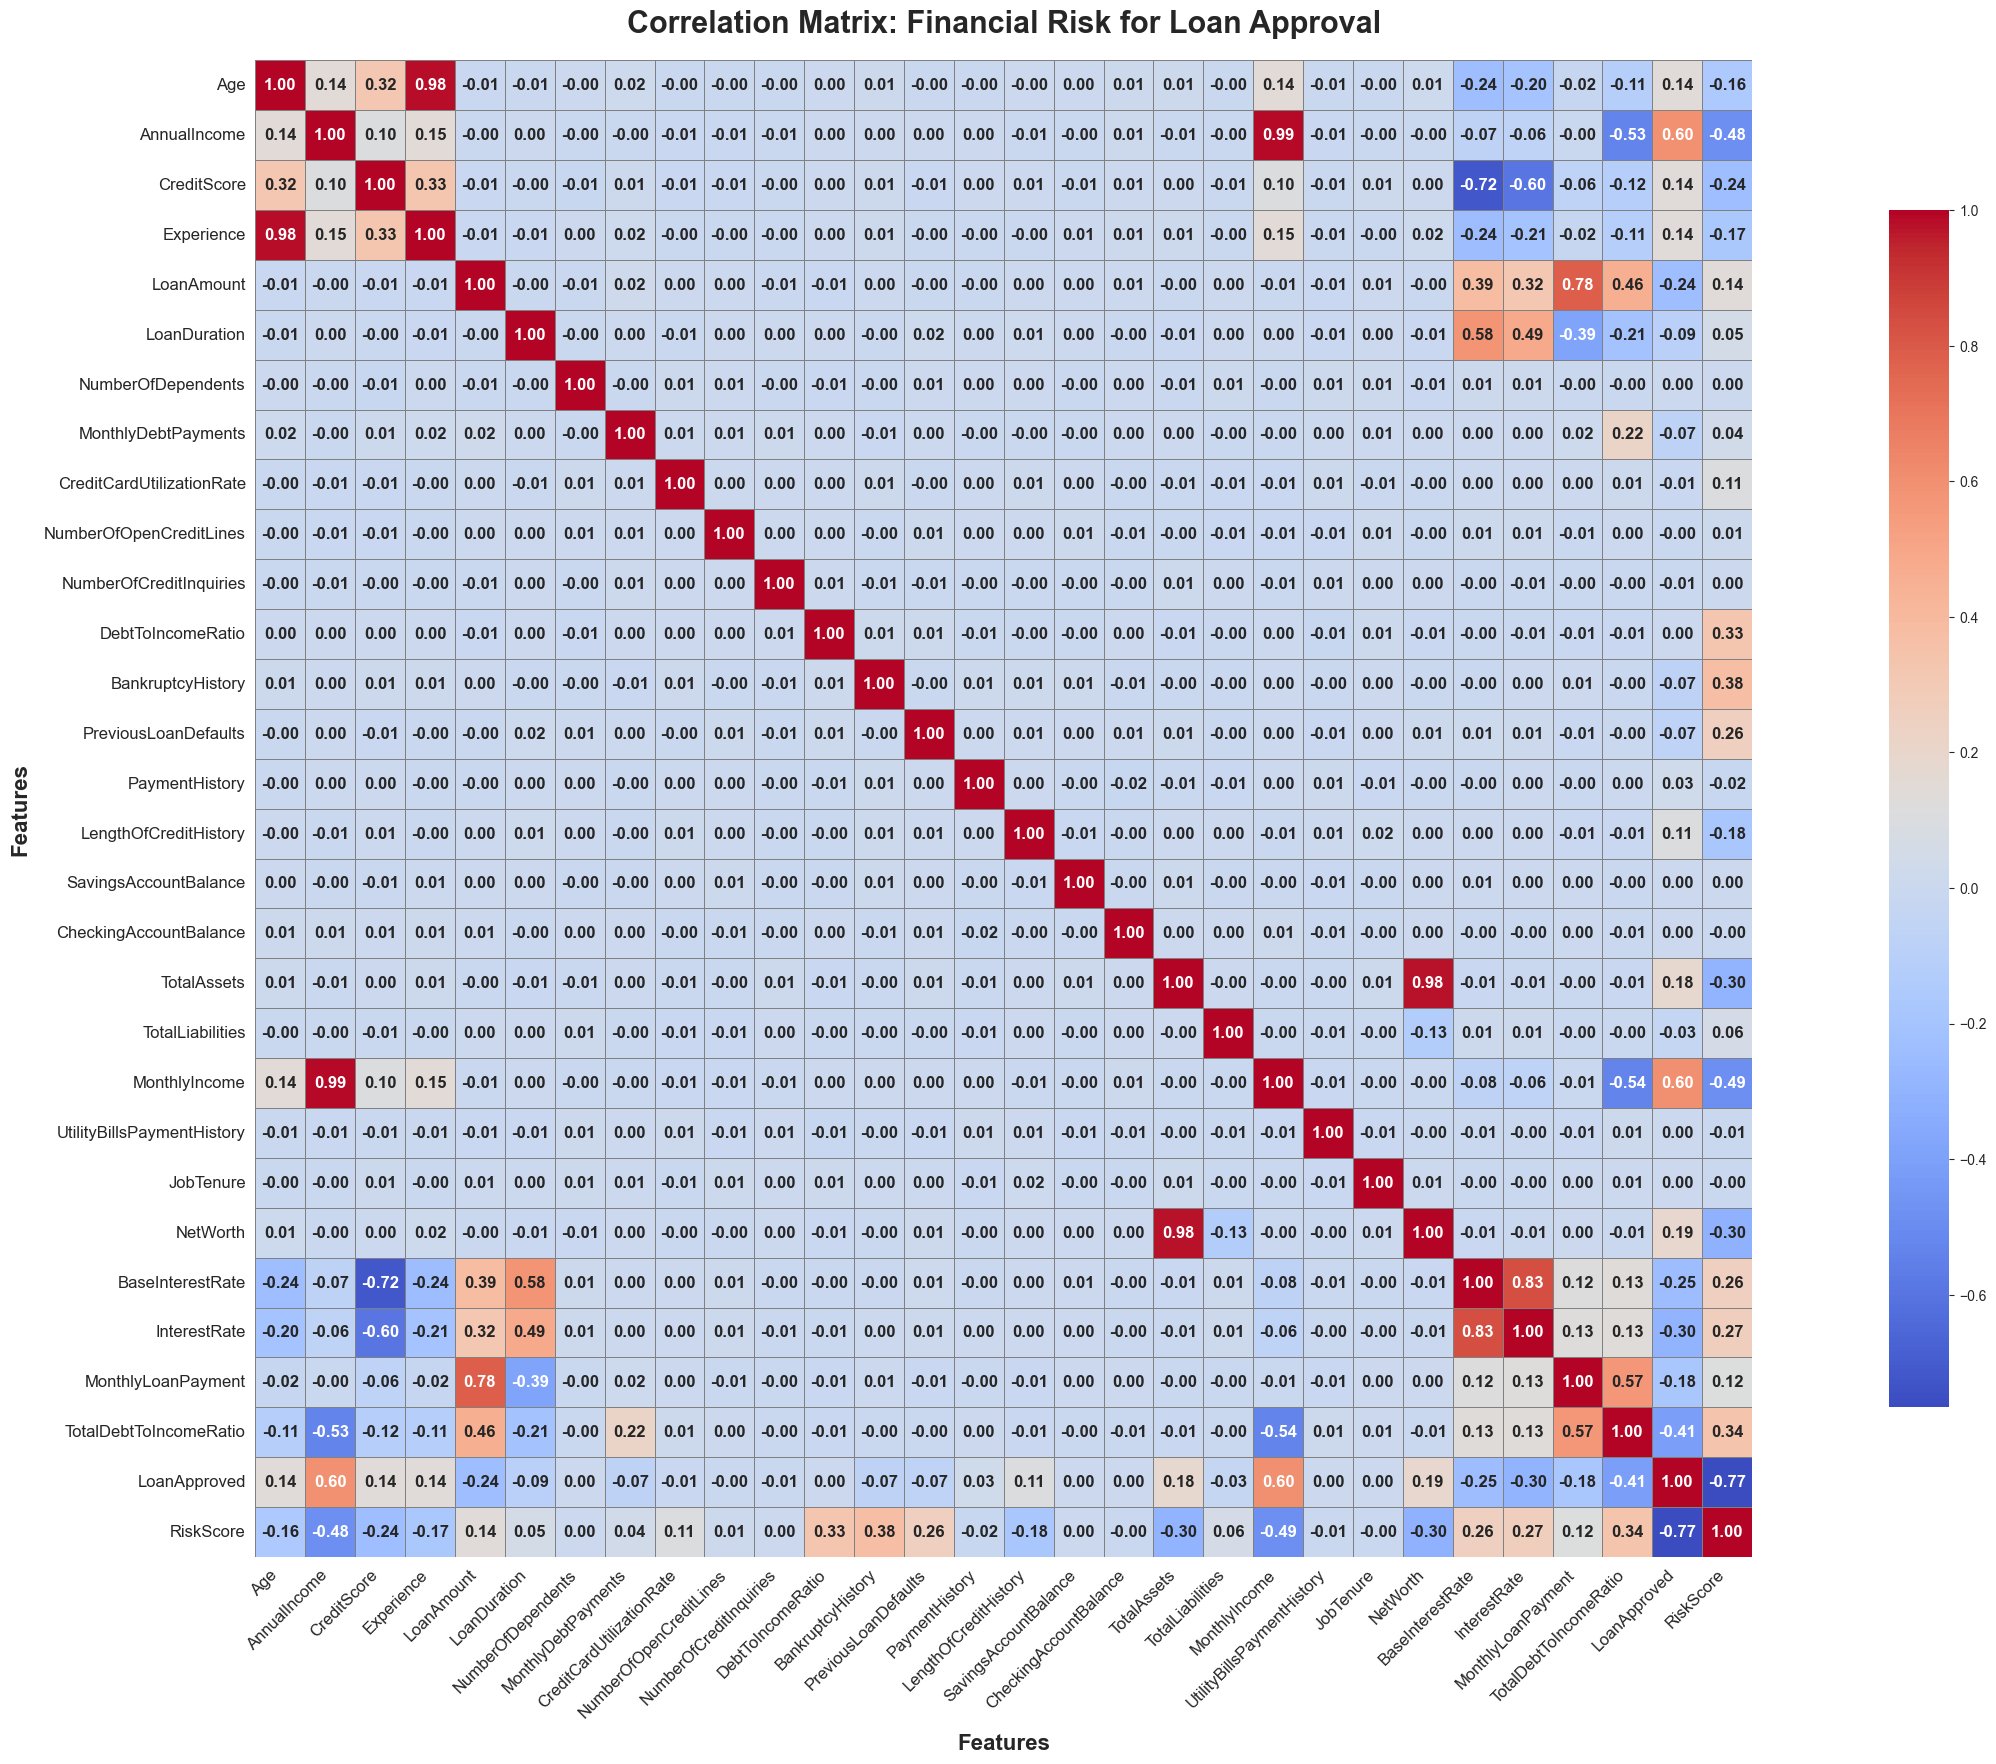

In [206]:

# Plot the correlation heatmap
plt.figure(figsize=(28, 18))  # Adjust figure size for a more professional layout

sns.heatmap(
    data=df.corr(numeric_only=True),
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5, 
    linecolor='gray',
    annot_kws={"size": 12, "weight": "bold"},  # Adjust annotation font size and weight
    cbar_kws={"shrink": 0.8, "aspect": 20, "orientation": "vertical"},  # Customize colorbar
    square=True  # Make cells square-shaped
)

# Title and labels with styling
plt.title('Correlation Matrix: Financial Risk for Loan Approval', fontsize=22, fontweight='bold', pad=20, loc='center')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='medium')  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12, fontweight='medium')  # Y-axis labels
plt.xlabel('Features', fontsize=16, fontweight='bold', labelpad=10)  # Add x-axis label
plt.ylabel('Features', fontsize=16, fontweight='bold', labelpad=10)  # Add y-axis label

# Adjust layout for better appearance
plt.tight_layout(pad=2.0)

# Display the heatmap
plt.show()


SUMMARY OF CORRELATION 

**Loan Approval**
1. MonthlyIncome :Strong positive correlation(0.60) The high or an increase in the MonthlyIncome the higher chance to get loan approval
2. AnnualIncome :Strong positive correlation ( 0.60) The high or an increase in the AnnualIncome the higher chance to get loan approval
3. RiskScore :Strong Negative correlation(-0.77) The increase in the RiskScore tends to decrease the higher chance to get loan approval

*No correlation
 
4. Variables like NumberOfOpenCreditLines ,SavingsAccountBalance ,NumberOfDependents ,CheckingAccountBalance ,JobTenure :No correlation(0.00)This means you're lickey to get loan approval 


**RiskScore**
1. MonthlyIncome :Weak Negative correlation(-0.48) The Low or an decrease in the MonthlyIncome also decrease RiskScore
2. AnnualIncome :Weak Negative correlation (-0.49) The Low or an decrease in the AnnualIncome also decrease RiskScore 
3. LoanApproved :Strong Negative correlation(-0.77) The increase in loan approval  tends to decrease the higher chance to get RiskScore

*No correlation
 
4. Variables like NumberOfOpenCreditLines ,SavingsAccountBalance ,NumberOfDependents ,CheckingAccountBalance ,JobTenure :No correlation(0.00)This means you're lickey to get Riskscore  

# Model Development<a id="5"></a>

I'm gonna start with linear and move to Classification

In [207]:
chat_data.columns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [208]:
#DATA ENCODING /One-Hot Encoding 

LR_Data = pd.get_dummies(df,
                            prefix=['EmploymentStatus', 'EducationLevel', 'MaritalStatus','HomeOwnershipStatus', 'LoanPurpose'],
                            columns=['EmploymentStatus', 'EducationLevel', 'MaritalStatus','HomeOwnershipStatus', 'LoanPurpose']
)
LR_Data



Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0       45         39948          617          22       13152            48   
1       38         39709          628          15       26045            48   
2       47         40724          570          26       17627            36   
3       58         69084          545          34       37898            96   
4       37        103264          594          17        9184            36   
...    ...           ...          ...         ...         ...           ...   
19995   44         30180          587          19       24521            36   
19996   56         49246          567          33       25818            36   
19997   44         48958          645          20       37033            72   
19998   60         41025          560          36       14760            72   
19999   20         53227          574           0       32055            48   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                       2                  183                       0.35   
1                       1                  496                       0.09   
2                       2                  902                       0.14   
3                       1                  755                       0.27   
4                       1                  274                       0.32   
...                   ...                  ...                        ...   
19995                   3                  673                       0.10   
19996                   5                  414                       0.47   
19997                   3                  512                       0.22   
19998                   3                  986                       0.36   
19999                   0                  272                       0.54   

       NumberOfOpenCreditLines  NumberOfCreditInquiries    DebtToIncomeRatio  \
0                            1                        2                 0.36   
1                            5                        3                 0.33   
2                            2                        0                 0.24   
3                            2                        1                 0.44   
4                            0                        0                 0.08   
...                        ...                      ...                  ...   
19995                        5                        1                 0.47   
19996                        2                        0                 0.32   
19997                        3                        1                 0.02   
19998                        4                        1                 0.53   
19999                        3                        1                 0.55   

       BankruptcyHistory  PreviousLoanDefaults  PaymentHistory  \
0                      0                     0              29   
1                      0                     0              21   
2                      0                     0              20   
3                      0                     0              27   
4                      0                     0              26   
...                  ...                   ...             ...   
19995                  0                     0              21   
19996                  0                     0              30   
19997                  0                     0              28   
19998                  0                     0              17   
19999                  0                     0              36   

       LengthOfCreditHistory  SavingsAccountBalance  CheckingAccountBalance  \
0                          9                   7632                    1202   
1                          9                   4627                    3460   
2                         22                    886                     895   
3                         10                   1675            

In [209]:
#CHANGING BOOL TO NUMERIC/INT
LR_Data[['EmploymentStatus_Employed','EmploymentStatus_Self-Employed','EmploymentStatus_Unemployed','EducationLevel_Associate','EducationLevel_Bachelor','EducationLevel_Doctorate','EducationLevel_High School','EducationLevel_Master','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','MaritalStatus_Widowed','HomeOwnershipStatus_Mortgage','HomeOwnershipStatus_Other','HomeOwnershipStatus_Own','HomeOwnershipStatus_Rent','LoanPurpose_Auto','LoanPurpose_Debt Consolidation','LoanPurpose_Education','LoanPurpose_Home','LoanPurpose_Other']] = LR_Data[['EmploymentStatus_Employed','EmploymentStatus_Self-Employed','EmploymentStatus_Unemployed','EducationLevel_Associate','EducationLevel_Bachelor','EducationLevel_Doctorate','EducationLevel_High School','EducationLevel_Master','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','MaritalStatus_Widowed','HomeOwnershipStatus_Mortgage','HomeOwnershipStatus_Other','HomeOwnershipStatus_Own','HomeOwnershipStatus_Rent','LoanPurpose_Auto','LoanPurpose_Debt Consolidation','LoanPurpose_Education','LoanPurpose_Home','LoanPurpose_Other']].astype('int') 

LR_Data.sample(5)

Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
12442   32         36673          591          10       29241            72   
8916    61         99734          620          37       43763            24   
12696   57         42371          659          32       24078            60   
16662   42        190914          577          18       53131            48   
11642   58         29644          586          36       15375            12   

       NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
12442                   0                  227                       0.25   
8916                    3                  384                       0.31   
12696                   4                  505                       0.43   
16662                   0                  229                       0.12   
11642                   3                  340                       0.25   

       NumberOfOpenCreditLines  NumberOfCreditInquiries    DebtToIncomeRatio  \
12442                        1                        1                 0.43   
8916                         3                        1                 0.12   
12696                        1                        2                 0.22   
16662                        3                        0                 0.08   
11642                        4                        2                 0.33   

       BankruptcyHistory  PreviousLoanDefaults  PaymentHistory  \
12442                  0                     0              23   
8916                   0                     0              18   
12696                  0                     0              25   
16662                  0                     0              26   
11642                  0                     0              20   

       LengthOfCreditHistory  SavingsAccountBalance  CheckingAccountBalance  \
12442                     28                   1610                     323   
8916                       1                    543                     551   
12696                      5                   5774                    1900   
16662                     18                   1311                     550   
11642                      5                    575                    4705   

       TotalAssets  TotalLiabilities        MonthlyIncome  \
12442        38746             27326              3056.08   
8916         71336              8328              8311.17   
12696       118798              4501              3530.92   
16662        16144             43279             15909.50   
11642       116295             19218              2470.33   

       UtilityBillsPaymentHistory  JobTenure  NetWorth     BaseInterestRate  \
12442                        0.64          9     11420                 0.25   
8916                         0.84          6     63008                 0.21   
12696                        0.80          5    114297                 0.20   
16662                        0.93          1      1392                 0.26   
11642                        0.97          8     97077                 0.19   

              InterestRate   MonthlyLoanPayment  TotalDebtToIncomeRatio  \
12442                 0.22               730.86                    0.31   
8916                  0.18              2182.52                    0.31   
12696                 0.21               646.41                    0.33   
16662                 0.26              1788.77                    0.13   
11642                 0.22              1437.71                    0.72   

       LoanApproved            RiskScore  EmploymentStatus_Employed  \
12442             0                57.00                          1   
8916              0                48.00                          1   
12696             0                46.00                          1   
16662             1                37.60                          1   
11642             0                56.00                          1 

### **FEATURE ENGINEERING**

In [210]:
# Independent variables (features) - All columns except 'RiskScore'
X = np.array(LR_Data.drop(columns=['RiskScore']))

# Dependent variable (target) - The 'RiskScore' 
y = np.array(LR_Data['RiskScore'])


In [211]:
#SPLITTING DATA 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.3),random_state=10)

#SIZE

print(f'Train size :',X_train.shape,y_train.shape)
print(f'Test size :',X_test.shape,y_test.shape)


Train size : (14000, 50) (14000,)
Test size : (6000, 50) (6000,)


In [212]:
#SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [214]:
# The coefficients in a dataframe
feature_names = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'EmploymentStatus_Employed',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed',
       'EducationLevel_Associate', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'HomeOwnershipStatus_Mortgage',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other']  
cdf = pd.DataFrame(lm.coef_, feature_names, columns=['coef'])
print(cdf)

                                               coef
Age                                            0.00
AnnualIncome                                  -0.00
CreditScore                                   -0.02
Experience                                    -0.02
LoanAmount                                    -0.00
LoanDuration                                   0.00
NumberOfDependents                             0.02
MonthlyDebtPayments                           -0.00
CreditCardUtilizationRate                      4.54
NumberOfOpenCreditLines                       -0.01
NumberOfCreditInquiries                       -0.01
DebtToIncomeRatio                             15.52
BankruptcyHistory                             11.75
PreviousLoanDefaults                           5.75
PaymentHistory                                -0.00
LengthOfCreditHistory                         -0.11
SavingsAccountBalance                         -0.00
CheckingAccountBalance                        -0.00
TotalAssets 

##  Evaluating the Model

In [215]:
# Model Evaluation: R² Score (Training and Testing)
train_r2 = lm.score(X_train, y_train)
test_r2 = lm.score(X_test, y_test)
print(f'R² Score (Training Set): {train_r2:.4f}')
print(f'R² Score (Testing Set): {test_r2:.4f}')

print("\n" + "="*50 + "\n")

# Model Evaluation: Root Mean Squared Error (RMSE)
train_rmse = sqrt(mean_squared_error(y_train, lm.predict(X_train)))
test_rmse = sqrt(mean_squared_error(y_test, lm.predict(X_test)))
print(f'RMSE (Training Set): {train_rmse:.4f}')
print(f'RMSE (Testing Set): {test_rmse:.4f}')

print("\n" + "="*50 + "\n")

# Model Evaluation: Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, lm.predict(X_train))
test_mae = mean_absolute_error(y_test, lm.predict(X_test))
print(f'MAE (Training Set): {train_mae:.4f}')
print(f'MAE (Testing Set): {test_mae:.4f}')

print("\n" + "="*50 + "\n")

# Model Coefficients and Intercept
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_}')


R² Score (Training Set): 0.9403
R² Score (Testing Set): 0.9372


RMSE (Training Set): 1.9078
RMSE (Testing Set): 1.9299


MAE (Training Set): 1.4824
MAE (Testing Set): 1.4892


Coefficients: [ 3.13565203e-04 -1.50433688e-05 -2.10367586e-02 -1.54751588e-02
 -4.94965587e-06  7.25226765e-04  1.73299399e-02 -4.76987489e-04
  4.54291250e+00 -9.82541394e-03 -7.97860064e-03  1.55240489e+01
  1.17504114e+01  5.74863914e+00 -4.68196245e-03 -1.10097902e-01
 -1.28343097e-06 -4.47600712e-06 -2.31776422e-06  3.03430768e-06
 -1.72655578e-05  1.50958170e-01 -7.17832517e-03 -1.01718599e-05
  1.11227299e-05 -1.08405749e+00 -3.46152677e-04  1.53047584e+00
 -1.06011293e+01 -1.94168178e+00  9.90646691e-01  9.51035088e-01
  1.32929822e-01  3.27653366e-02 -2.35830845e-01  1.84840816e-01
 -1.14705130e-01 -3.42815906e-02 -5.58130257e-02 -3.93635730e-02
  1.29458189e-01  3.73323662e-02 -6.75134674e-02 -4.11248257e-03
  3.42935838e-02 -6.33048421e-02  1.20434661e-02  4.12512482e-02
  6.27629232e-03  3.73383541e

Model Performance:
* Model is performing well with high R² scores (indicating it explains most of the variance in both the training and test data). 
* The RMSE and MAE values are consistent, further supporting the absence of overfitting.

In [216]:
Predictions = lm.predict(X_test)
Predictions

array([59.80385239, 54.30277386, 54.34425712, ..., 51.59834205,
       36.90588169, 50.81067911])

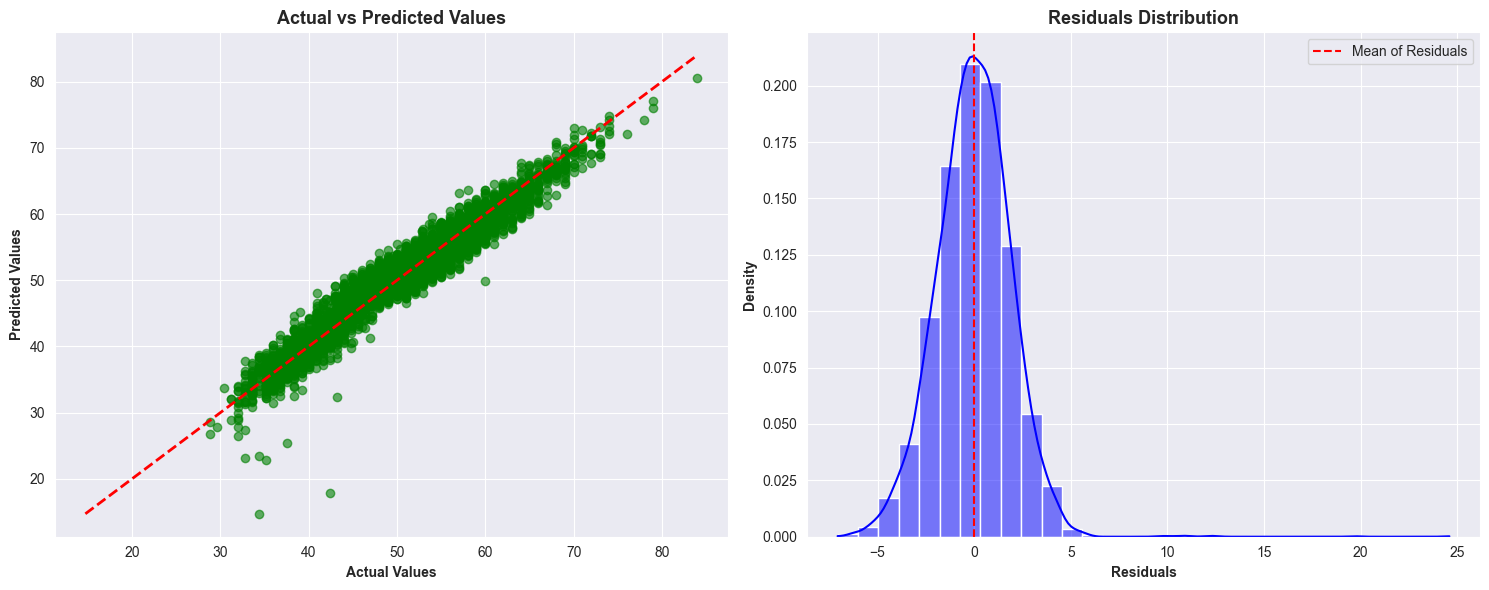

In [217]:

# Actual vs. Predicted Plot
plt.figure(figsize=(15,6))

# Scatter plot of Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, Predictions, c='green', alpha=0.6)
plt.xlabel("Actual Values", fontsize=10, weight='bold')
plt.ylabel("Predicted Values", fontsize=10, weight='bold')
plt.title("Actual vs Predicted Values", fontsize=13, weight='bold')

# Plot y=x line to show how close predictions are to actual values
min_val = min(min(y_test), min(Predictions))
max_val = max(max(y_test), max(Predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

# Residuals Distribution Plot
plt.subplot(1, 2, 2)
residuals = y_test - Predictions
sns.histplot(residuals, bins=30, kde=True, color='blue', stat='density')

# Adding vertical line at the mean of residuals
plt.axvline(residuals.mean(), color='r', linestyle='--', label='Mean of Residuals')

plt.title('Residuals Distribution', fontsize=13, weight='bold')
plt.xlabel('Residuals', fontsize=10, weight='bold')
plt.ylabel('Density', fontsize=10, weight='bold')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [218]:
#calculating residuals

np.mean(residuals)

-0.016320736157959908

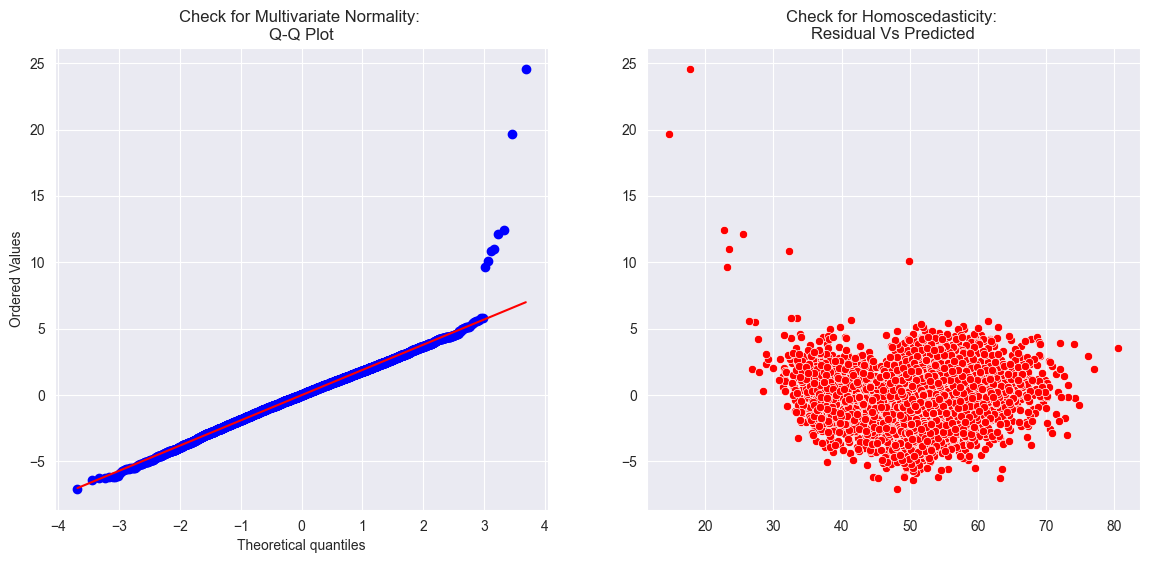

In [219]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - Predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - Predictions), x= Predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

The regression model performs well overall, with reasonable predictive accuracy.
*  The curve in the Actual vs. Predicted Values plot indicates non-linearity.
*  The residual distribution is centered around zero (good), but it is right-skewed.
*  The Q-Q plot shows that residuals above a log value of 1.5 tend to diverge from the theoretical normal line.
*  The residuals vs. predicted plot exhibits increasing variance after a certain point, indicating heteroscedasticity.
*  The Variance Inflation Factor (VIF) values are below 5, indicating no multicollinearity.

In [220]:
CR_Data = LR_Data
CR_Data.head()

Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0   45         39948          617          22       13152            48   
1   38         39709          628          15       26045            48   
2   47         40724          570          26       17627            36   
3   58         69084          545          34       37898            96   
4   37        103264          594          17        9184            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                       0.35   
1                   1                  496                       0.09   
2                   2                  902                       0.14   
3                   1                  755                       0.27   
4                   1                  274                       0.32   

   NumberOfOpenCreditLines  NumberOfCreditInquiries    DebtToIncomeRatio  \
0                        1                        2                 0.36   
1                        5                        3                 0.33   
2                        2                        0                 0.24   
3                        2                        1                 0.44   
4                        0                        0                 0.08   

   BankruptcyHistory  PreviousLoanDefaults  PaymentHistory  \
0                  0                     0              29   
1                  0                     0              21   
2                  0                     0              20   
3                  0                     0              27   
4                  0                     0              26   

   LengthOfCreditHistory  SavingsAccountBalance  CheckingAccountBalance  \
0                      9                   7632                    1202   
1                      9                   4627                    3460   
2                     22                    886                     895   
3                     10                   1675                    1217   
4                     27                   1555                    4981   

   TotalAssets  TotalLiabilities        MonthlyIncome  \
0       146111             19183              3329.00   
1        53204              9595              3309.08   
2        25176            128874              3393.67   
3       104822              5370              5757.00   
4       244305             17286              8605.33   

   UtilityBillsPaymentHistory  JobTenure  NetWorth     BaseInterestRate  \
0                        0.72         11    126928                 0.20   
1                        0.94          3     43609                 0.21   
2                        0.87          6      5205                 0.22   
3                        0.90          5     99452                 0.30   
4                        0.94          5    227019                 0.20   

          InterestRate   MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0                 0.23               419.81                    0.18   
1                 0.20               794.05                    0.39   
2                 0.21               666.41                    0.46   
3                 0.30              1047.51                    0.31   
4                 0.18               330.18                    0.07   

   LoanApproved            RiskScore  EmploymentStatus_Employed  \
0             0                49.00                          1   
1             0                52.00                          1   
2             0                52.00                          1   
3             0                54.00                          1   
4             1                36.00                          1   

   EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
0                               0                            0   
1                               0                            0   
2         

In [221]:
X = np.array(CR_Data.drop(columns=['LoanApproved']))
y = np.array(CR_Data['LoanApproved'])

In [222]:
#SPLITTING DATA 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(0.3),random_state=10)

#SIZE

print(f'Train size :',X_train.shape,y_train.shape)
print(f'Test size :',X_test.shape,y_test.shape)

Train size : (14000, 50) (14000,)
Test size : (6000, 50) (6000,)


In [223]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## **1. LogisticRegression**

In [225]:
# LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.87%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 0.91                 0.81                 0.89   
recall                    0.95                 0.71                 0.89   
f1-score                  0.93                 0.75                 0.89   
support               10633.00              3367.00                 0.89   

                     macro avg         weighted avg  
precision                 0.86                 0.89  
recall                    0.83                 0.89  
f1-score                  0.84                 0.89  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10055   578]
 [  980  2387]]

Test Result:
Accuracy Score: 89.20%
_______________________________________________
CLASSIFICATION REPORT:
                             0    

In [226]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %   Testing Accuracy %
0  Logistic Regression                88.87                89.20

## **2. LogisticRegression**

In [227]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.46%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 0.93                 0.83                 0.90   
recall                    0.95                 0.77                 0.90   
f1-score                  0.94                 0.79                 0.90   
support               10633.00              3367.00                 0.90   

                     macro avg         weighted avg  
precision                 0.88                 0.90  
recall                    0.86                 0.90  
f1-score                  0.87                 0.90  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10088   545]
 [  791  2576]]

Test Result:
Accuracy Score: 86.57%
_______________________________________________
CLASSIFICATION REPORT:
                             0    

## **3. DecisionTreeClassifier**

In [228]:

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 1.00                 1.00                 1.00   
recall                    1.00                 1.00                 1.00   
f1-score                  1.00                 1.00                 1.00   
support               10633.00              3367.00                 1.00   

                     macro avg         weighted avg  
precision                 1.00                 1.00  
recall                    1.00                 1.00  
f1-score                  1.00                 1.00  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10633     0]
 [    0  3367]]

Test Result:
Accuracy Score: 99.05%
_______________________________________________
CLASSIFICATION REPORT:
                             0   

## **4. XGBClassifier**

In [229]:

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 1.00                 1.00                 1.00   
recall                    1.00                 1.00                 1.00   
f1-score                  1.00                 1.00                 1.00   
support               10633.00              3367.00                 1.00   

                     macro avg         weighted avg  
precision                 1.00                 1.00  
recall                    1.00                 1.00  
f1-score                  1.00                 1.00  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10633     0]
 [    0  3367]]

Test Result:
Accuracy Score: 99.67%
_______________________________________________
CLASSIFICATION REPORT:
                             0   

##  **5. Support Vector machine**

In [230]:

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 1.00                 1.00                 1.00   
recall                    1.00                 1.00                 1.00   
f1-score                  1.00                 1.00                 1.00   
support               10633.00              3367.00                 1.00   

                     macro avg         weighted avg  
precision                 1.00                 1.00  
recall                    1.00                 1.00  
f1-score                  1.00                 1.00  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10633     0]
 [    0  3367]]

Test Result:
Accuracy Score: 76.45%
_______________________________________________
CLASSIFICATION REPORT:
                             0   

## **6. Random Forest**

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                             0                    1             accuracy  \
precision                 1.00                 1.00                 1.00   
recall                    1.00                 1.00                 1.00   
f1-score                  1.00                 1.00                 1.00   
support               10633.00              3367.00                 1.00   

                     macro avg         weighted avg  
precision                 1.00                 1.00  
recall                    1.00                 1.00  
f1-score                  1.00                 1.00  
support               14000.00             14000.00  
_______________________________________________
Confusion Matrix: 
 [[10633     0]
 [    0  3367]]

Test Result:
Accuracy Score: 98.73%
_______________________________________________
CLASSIFICATION REPORT:
                             0   

**Top 3 models perform well on training and testing data**

1. XGBClassifier = Accuracy Score: 99.67%
2. DecisionTreeClassifier = Accuracy Score: 99.05%
3. Random Forest = Accuracy Score: 98.73%

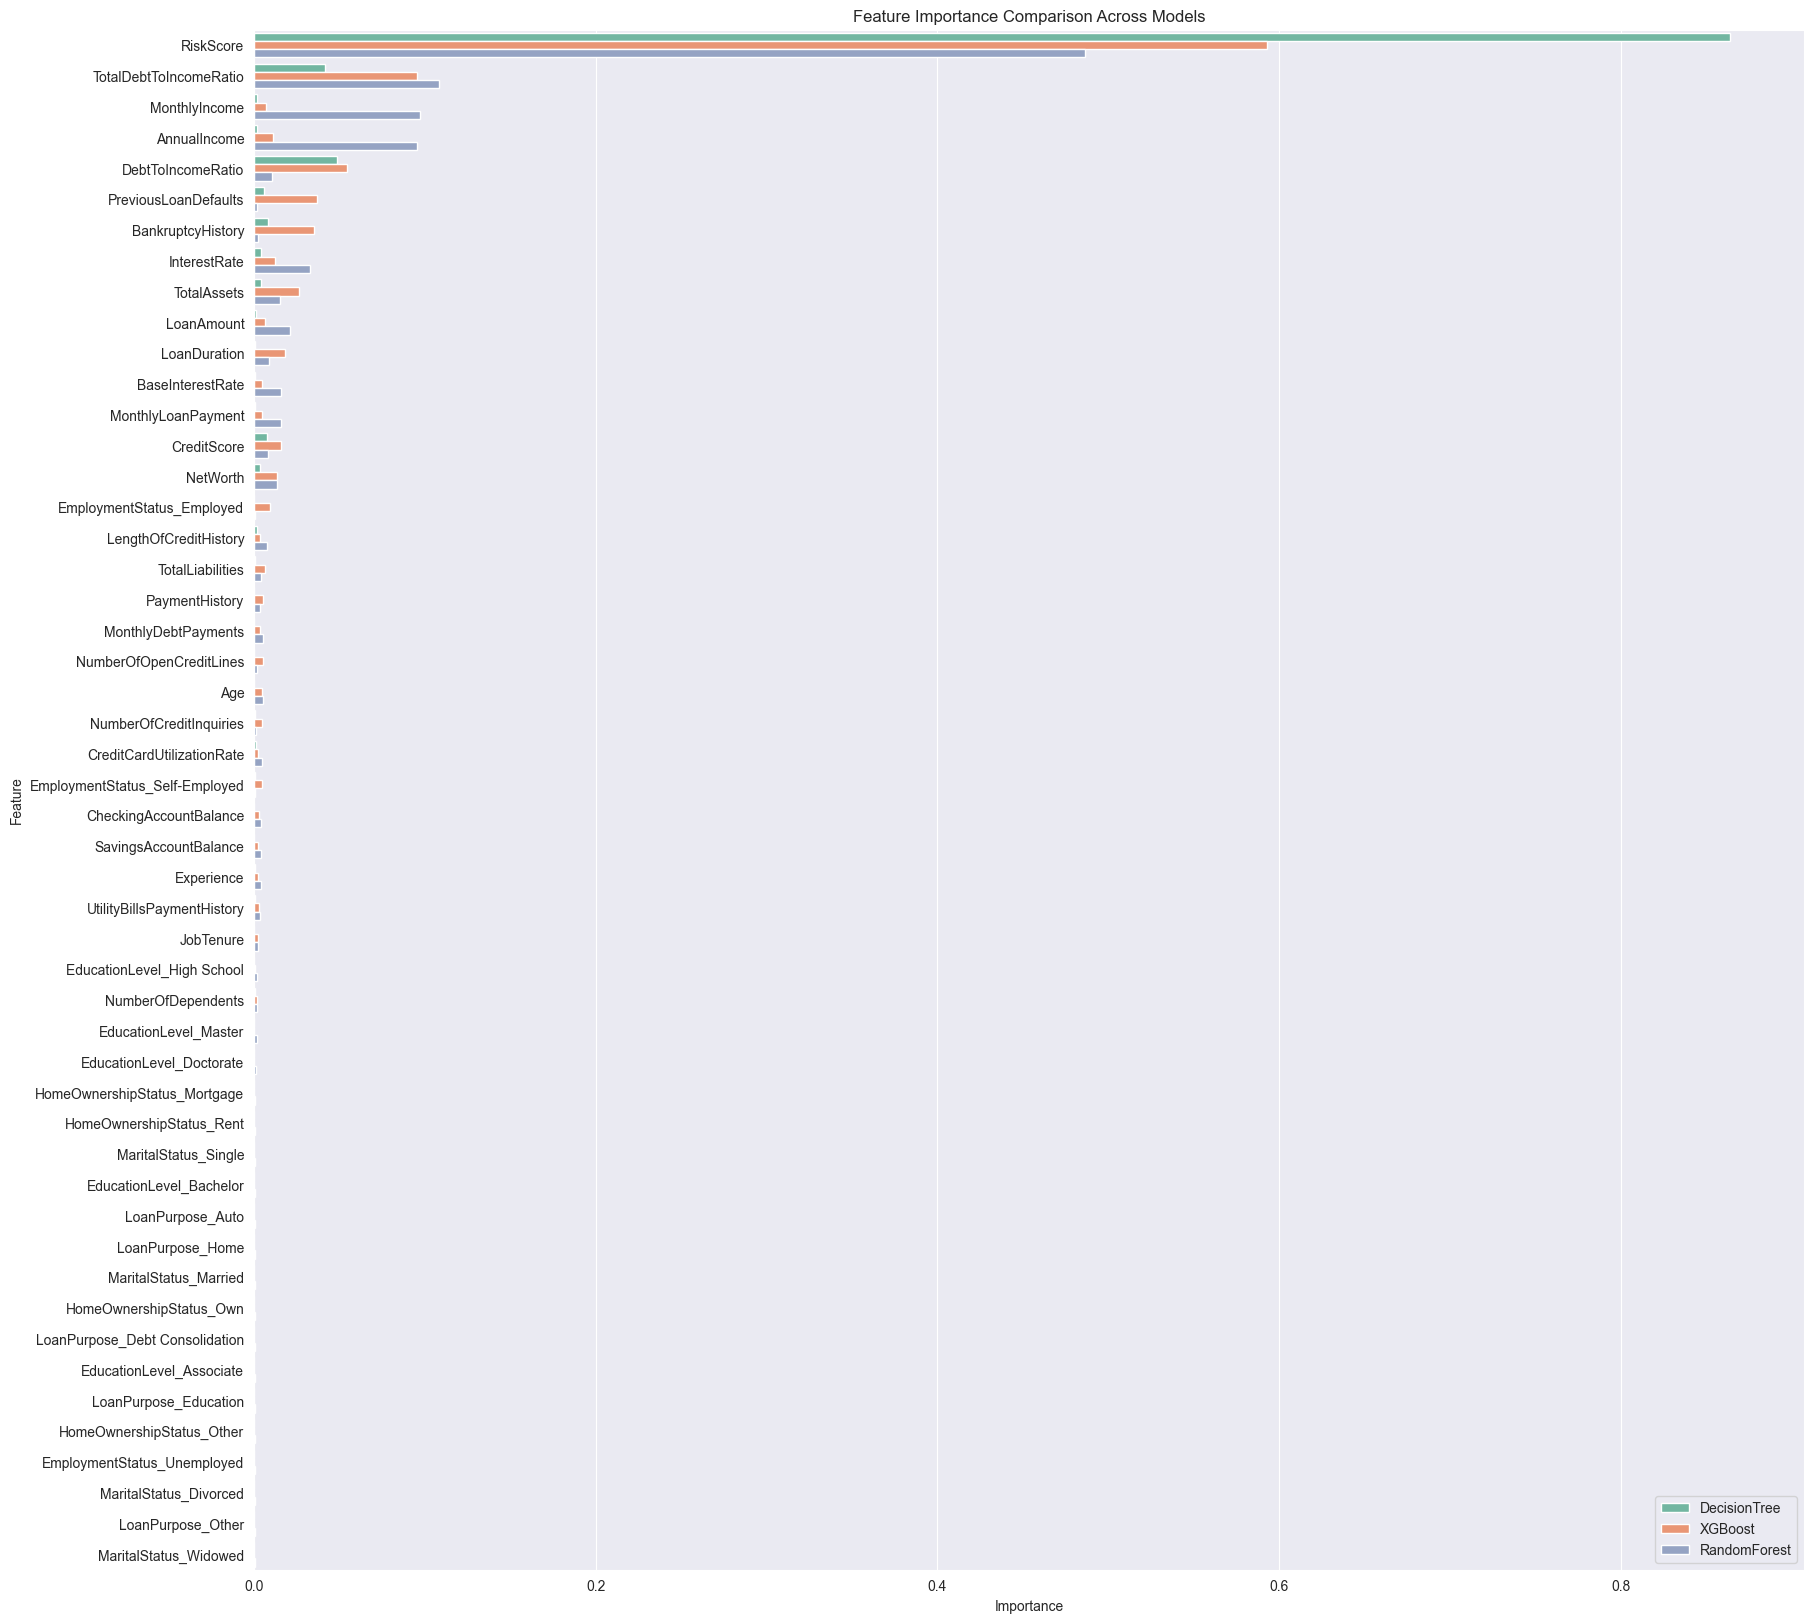

In [232]:
X = CR_Data.drop(columns=['LoanApproved'])  
y = CR_Data['LoanApproved']

# Train multiple models
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X, y)

# Extract feature importance from each model
rf_importance = rf_model.feature_importances_
dt_importance = tree_clf.feature_importances_
xgb_importance = xgb_clf.feature_importances_

# Get feature names (columns from the DataFrame)
feature_names = X.columns

# Create a DataFrame for comparison
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importance,
    'DecisionTree': dt_importance,
    'XGBoost': xgb_importance
})

# Melt the DataFrame for seaborn
importance_df_melted = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Sort by importance for better visualization
importance_df_melted = importance_df_melted.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importance_df_melted, palette='Set2')
plt.title("Feature Importance Comparison Across Models")
plt.legend(loc='lower right')
plt.show()

**Summary and Future Work**
**Insights:**

The XGBClassifier showed the best performance for loan approval predictions, with an accuracy of 99.67%.
The linear regression model provided meaningful results for risk score prediction but highlighted areas for improvement in addressing heteroscedasticity and non-linearity.
Future Directions:

Test additional models such as Gradient Boosting Regression or Neural Networks for risk score prediction to address non-linear patterns.
Perform advanced feature engineering to reduce heteroscedasticity.
Explore other classification models to refine loan approval predictions.

In [234]:
df.to_csv('Financial_dash.csv',index=False) # FOR DASHBOARD 